# Stock Returns Prediction with Supervised Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
# import seaborn and matplotlib for charting and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#import plotly and cufflinks for interactive visualisations
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# To import csv file containing fundamental data downloaded from S&P Capital IQ, as well as other features and the labels for machine learning.
stockdata = pd.read_csv('cleaned stockdata.csv', index_col=0)

In [5]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 2949
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          2839 non-null   object 
 1   longName                        2839 non-null   object 
 2   Name                            2839 non-null   object 
 3   IPO Year                        1088 non-null   float64
 4   Sector                          2674 non-null   object 
 5   Effective annual return         2839 non-null   float64
 6   CIQ ID                          2839 non-null   object 
 7   Ticker                          2730 non-null   object 
 8   Country.1                       2839 non-null   object 
 9   Short Business Description      2831 non-null   object 
 10  IQ_TOTAL_REV                    2839 non-null   float64
 11  IQ_RETURN_ASSETS                2839 non-null   float64
 12  IQ_RETURN_EQUITY                28

Fundamental data were downloaded from Capital IQ to be used as features to predict effective annual return (from 4-Jan-2010 to 2-Jan-2020). These fundamental data are for financial year ending 2009 updated as at 01-Apr-2023 (date of retrieval of data), and are in USD (for monetary figures - using historical exchange rates) or % (for ratios). <br> <br>
The fundamental data (29 metrics in total) obtained from Capital IQ have the following definitions: <br>
**IQ_TOTAL_REV**: Revenues + Other Revenues, Total	<br>
**IQ_RETURN_ASSETS**: EBIT * (1-0.375) / Average Total Assets	<br>
**IQ_RETURN_EQUITY**:	Earnings from Continuing Operations / Average Total Equity<br>
**IQ_GROSS_MARGIN**: Gross Profit / Total Revenues <br>
**IQ_EBITDA_MARGIN**: EBITDA / Total Revenues	<br>
**IQ_NI_MARGIN**: Net Income / Total Revenues	<br>
**IQ_AUDITOR_OPINION**: Auditor Opinion	<br>
**IQ_ASSET_TURNS**: Total Revenues / Average Total Assets	<br>
**IQ_CURRENT_RATIO**: Total Current Assets / Total Current Liabilities	<br>
**IQ_DAYS_SALES_OUT**: Average Accounts Receivable / Revenues * 360	<br>
**IQ_DAYS_INVENTORY_OUT**: Average Inventory / Cost of Goods Sold * 360	<br>
**IQ_DAYS_PAYABLE_OUT**: Average Accounts Payable / (Cost of Goods Sold - Beginning Inventory + Ending Inventory) * Number of Days in the Period	<br>
**IQ_TOTAL_DEBT_EQUITY**: Total Debt / Total Equity	<br>
**IQ_TOTAL_REV_1YR_ANN_GROWTH**: Total Revenues (t) / Total Revenues (t-1) - 1	<br>
**IQ_NI_1YR_ANN_GROWTH**: Net Income (t) / Net Income (t-1) -1	<br>
**IQ_CFO_1YR_ANN_GROWTH**: Cash from Operations (t) / Cash from Operations (t-1) -1	<br>
**IQ_TOTAL_ASSETS_1YR_ANN_GROWTH**: Total Assets (t) / Total Assets (t-1) -1	<br>
**IQ_EBITDA**: EBITDA	<br>
**IQ_PAYOUT_RATIO**: (Common Dividends Paid + Preferred Dividends Paid) / Net Income	<br>
**IQ_CASH_ST_INVEST**: Cash and Equivalents + Short Term Investments + Trading Asset Securities	<br>
**IQ_NPPE**: Gross Property Plant and Equipment + Accumulated Depreciation	<br>
**IQ_GW**: Goodwill	<br>
**IQ_RE**: Retained Earnings	<br>
**IQ_TBV**: Book Value of Common Equity - Goodwill = Other Intangibles - Fin. Div. Goodwill - Fin. Div. Other Intangibles	<br>
**IQ_NET_DEBT**: Total Debt - Total Cash and Short Term Investments - Long Term Marketable Securities	<br>
**IQ_CONTINGENT_LIABILITIES**: Contingent Liabilites <br>
**IQ_CASH_OPER**: Cash from Operations <br>
**IQ_CASH_INVEST**: Cash from Investing <br>
**IQ_NET_CHANGE**: Cash from Operations + Cash from Investing + Cash from Financing + Foreign Exchange Rate Adjustments + Misc. Cash Flow Adjustments

In [6]:
stockdata.describe()

IPO Year  Effective annual return   IQ_TOTAL_REV  IQ_RETURN_ASSETS  \
count  1088.000000              2839.000000    2839.000000       2839.000000   
mean   1999.438419                 0.061810    4216.729779         -5.524527   
std      10.263227                 0.154256   17120.258993        176.533778   
min    1925.000000                -0.919726    -426.753000      -8061.179000   
25%    1994.000000                 0.005479      21.414165          0.000000   
50%    2000.000000                 0.086423     239.245000          2.477600   
75%    2005.000000                 0.151896    1720.057000          5.570950   
max    2022.000000                 0.859211  404254.000000        428.299600   

       IQ_RETURN_EQUITY  IQ_GROSS_MARGIN  IQ_EBITDA_MARGIN  IQ_NI_MARGIN  \
count       2839.000000      2839.000000       2839.000000   2839.000000   
mean           3.577942        38.097066          9.408641     38.148725   
std          787.785909        35.699845         66.597052    302.316087   
min       -19765.912800      -298.529900       -287.114600   -294.239500   
25%           -2.390350        11.642350          0.000000      0.000000   
50%            4.270100        32.843900          5.631500      3.114500   
75%           13.669750        60.199400         18.250450     12.505300   
max        36447.311700       343.736200       3185.777200   8604.899500   

       IQ_ASSET_TURNS  IQ_CURRENT_RATIO  ...  IQ_CASH_ST_INVEST  \
count     2839.000000       2839.000000  ...       2.839000e+03   
mean         0.682982          3.479807  ...       5.285975e+03   
std          1.170766         12.508718  ...       6.002175e+04   
min          0.000000          0.000000  ...       0.000000e+00   
25%          0.049965          0.731230  ...       3.634875e+00   
50%          0.446490          1.608980  ...       4.280700e+01   
75%          0.985320          2.970845  ...       2.606135e+02   
max         43.733460        445.885130  ...       1.474338e+06   

             IQ_NPPE         IQ_GW          IQ_RE         IQ_TBV  \
count    2839.000000   2839.000000    2839.000000    2839.000000   
mean     1849.578248    844.450665    1602.196401    1642.343972   
std      7840.701995   4175.885093    9591.661549    8530.716335   
min         0.000000      0.000000 -120353.219900  -59921.000000   
25%         1.099730      0.000000     -27.459835       7.026155   
50%        43.656000      1.469000      18.062800     130.334500   
75%       516.002000    148.163500     419.121500     583.344500   
max    139116.000000  86314.000000  276937.000000  131075.000000   

        IQ_NET_DEBT  IQ_CONTINGENT_LIABILITIES   IQ_CASH_OPER  IQ_CASH_INVEST  \
count  2.839000e+03                2839.000000    2839.000000     2839.000000   
mean   9.139569e+02                 199.971428     652.976778     -302.254709   
std    2.867931e+04                3050.350435    6631.846568     5504.586338   
min   -1.135656e+06                   0.000000 -167703.133700   -85718.218890   
25%   -1.603750e+01                   0.000000       0.000000     -118.095500   
50%    5.772000e+00                   0.000000      33.585460      -10.843000   
75%    3.722660e+02                   0.000000     240.244000        0.000000   
max    4.955390e+05               83612.108630  146467.975100   157925.000000   

       IQ_NET_CHANGE  
count    2839.000000  
mean       70.986914  
std      3205.165232  
min    -46679.000000  
25%        -2.990000  
50%         0.080960  
75%        33.889500  
max     88482.000000  

[8 rows x 30 columns]

Text(0.5, 1.0, 'Correlation heatmap')

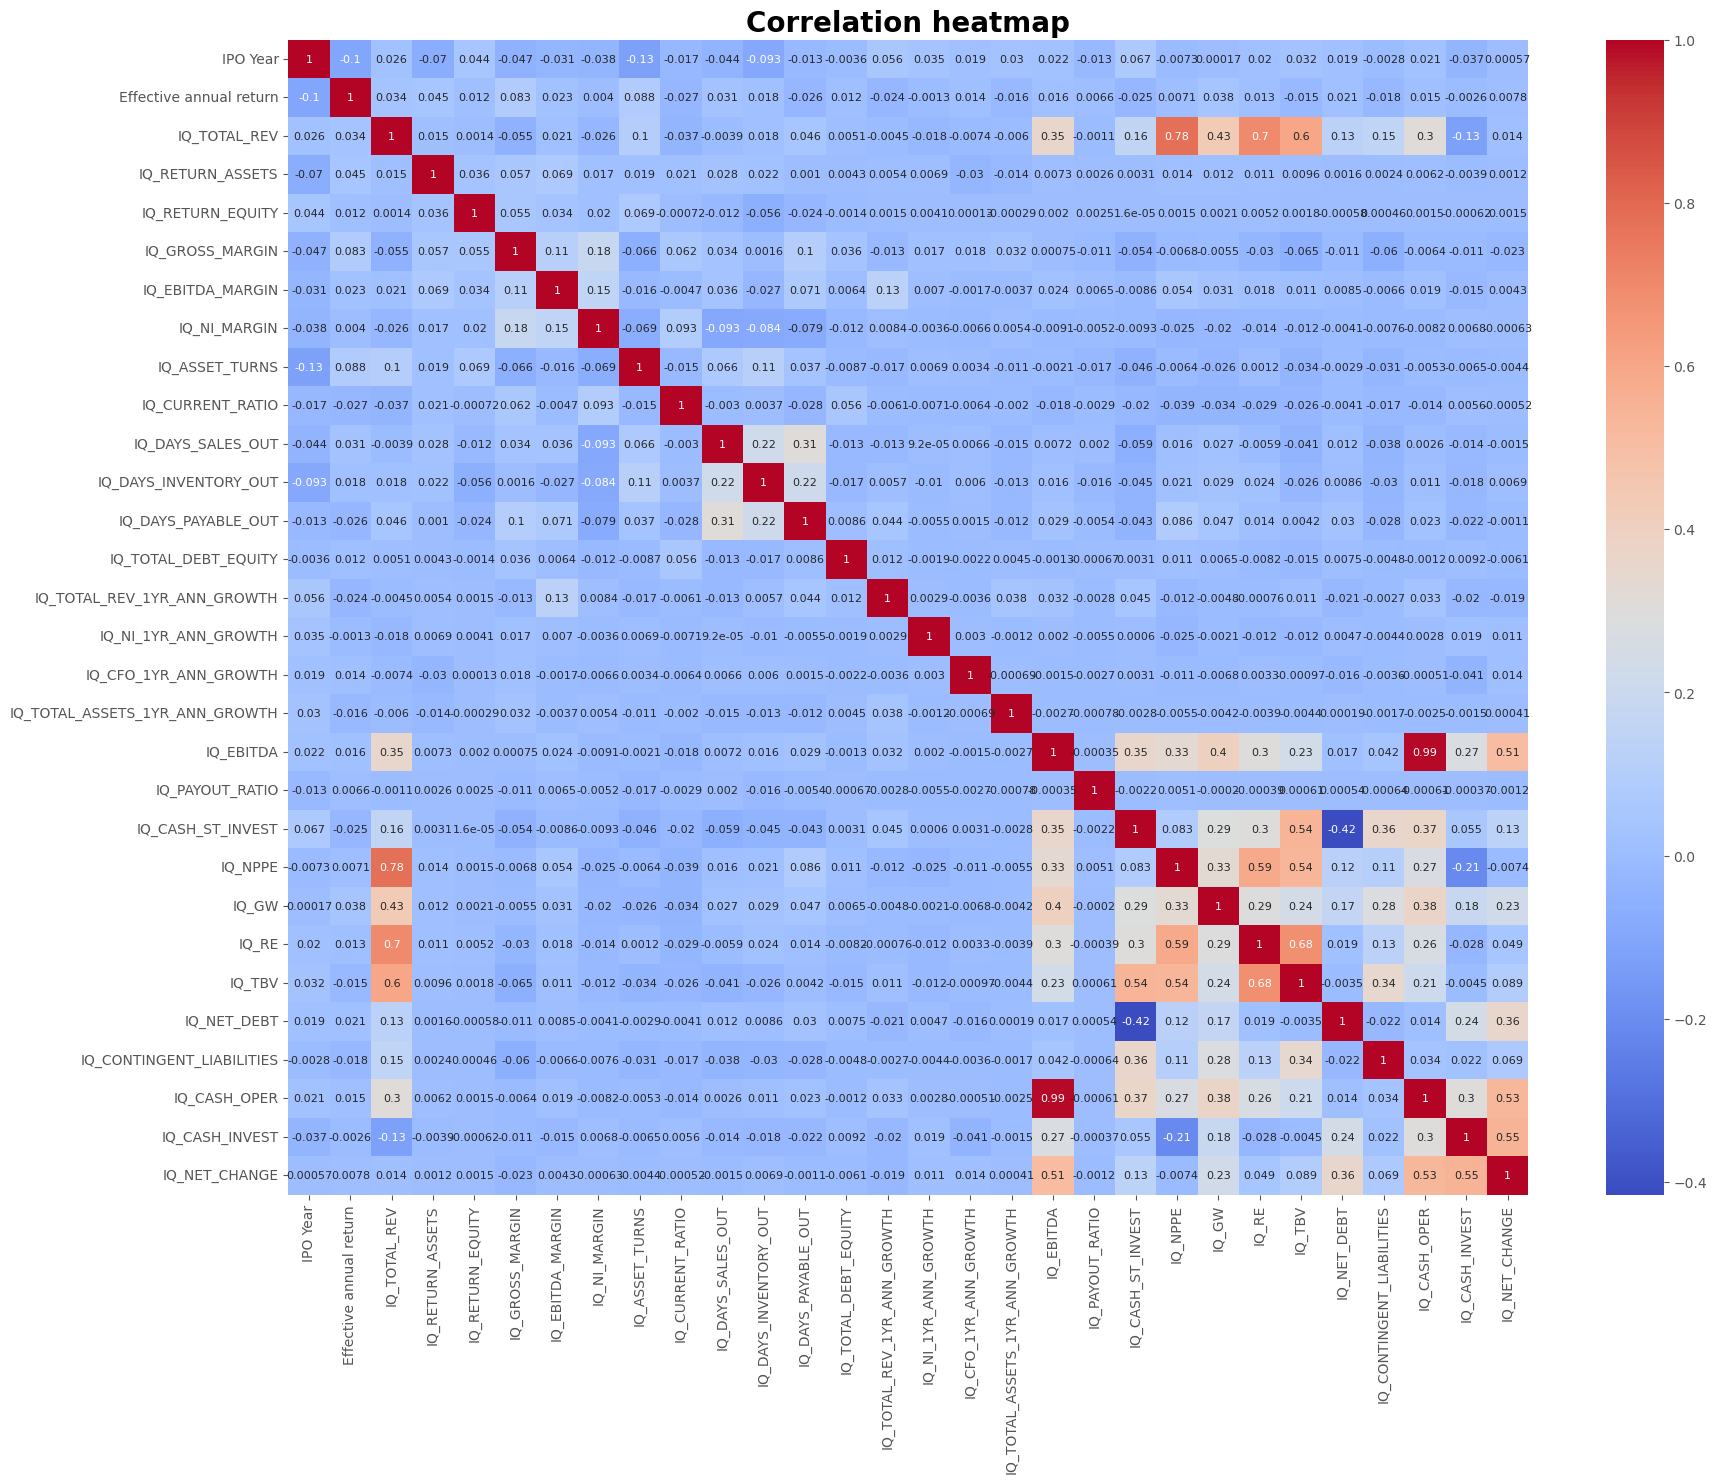

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(stockdata.corr(), cmap='coolwarm', annot=True, annot_kws={'size':8}).set_title('Correlation heatmap', fontdict={'size': 20, 'weight': 'bold'})

We see that total revenue is quite positively linearly correlated with net property, plant and equipment, retained earnings and tangible book value, which makes sense. Bigger companies tend to have higher revenue and more substantial balance sheets. <br> Net debt is quite negatively correlated with cash and short term investments, which makes sense as well - the higher a company's cash and short term investments, the lower the net debt. <br> Cash from operating activities is almost perfectly positively correlated with EBITDA. In the data cleanup section of the project, 278 null values for EBTIDA were replaced with the corresponding value for cash from operations. The positive correlation also makes sense since EBITDA is often used as a proxy for cash flows.

Text(0.5, 1.0, 'Correlation with effective annual return')

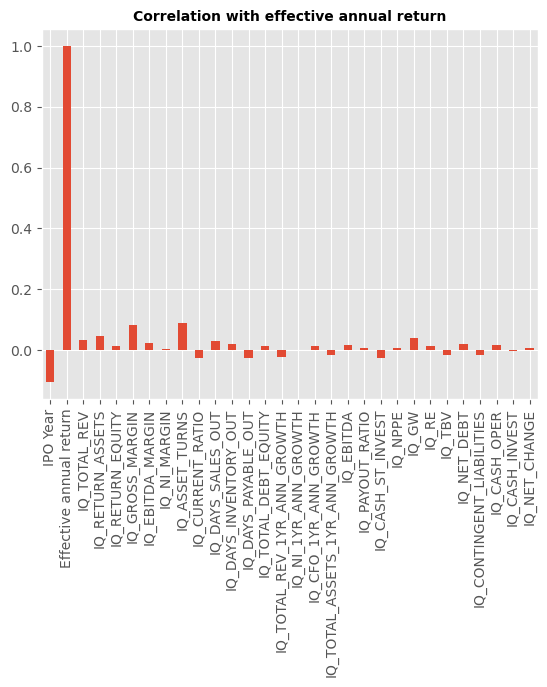

In [8]:
stockdata.corr()['Effective annual return'].plot.bar().set_title('Correlation with effective annual return', fontdict={'size': 10, 'weight': 'bold'})

We see that effective annual return has generally low correlation with the features.

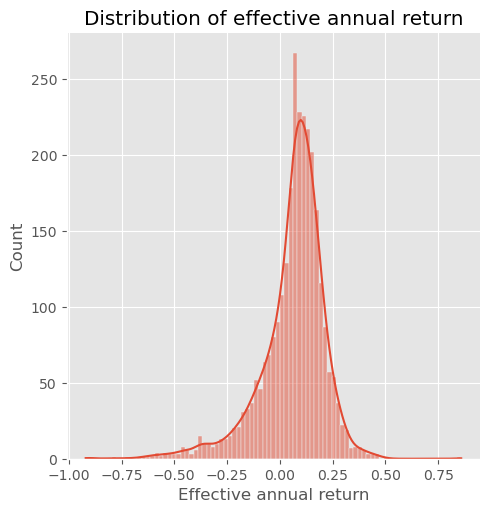

In [9]:
sns.displot(x='Effective annual return', data=stockdata, kde=True).set(title='Distribution of effective annual return')

Effective annual return has a positive median and a longer tail towards the negative returns.

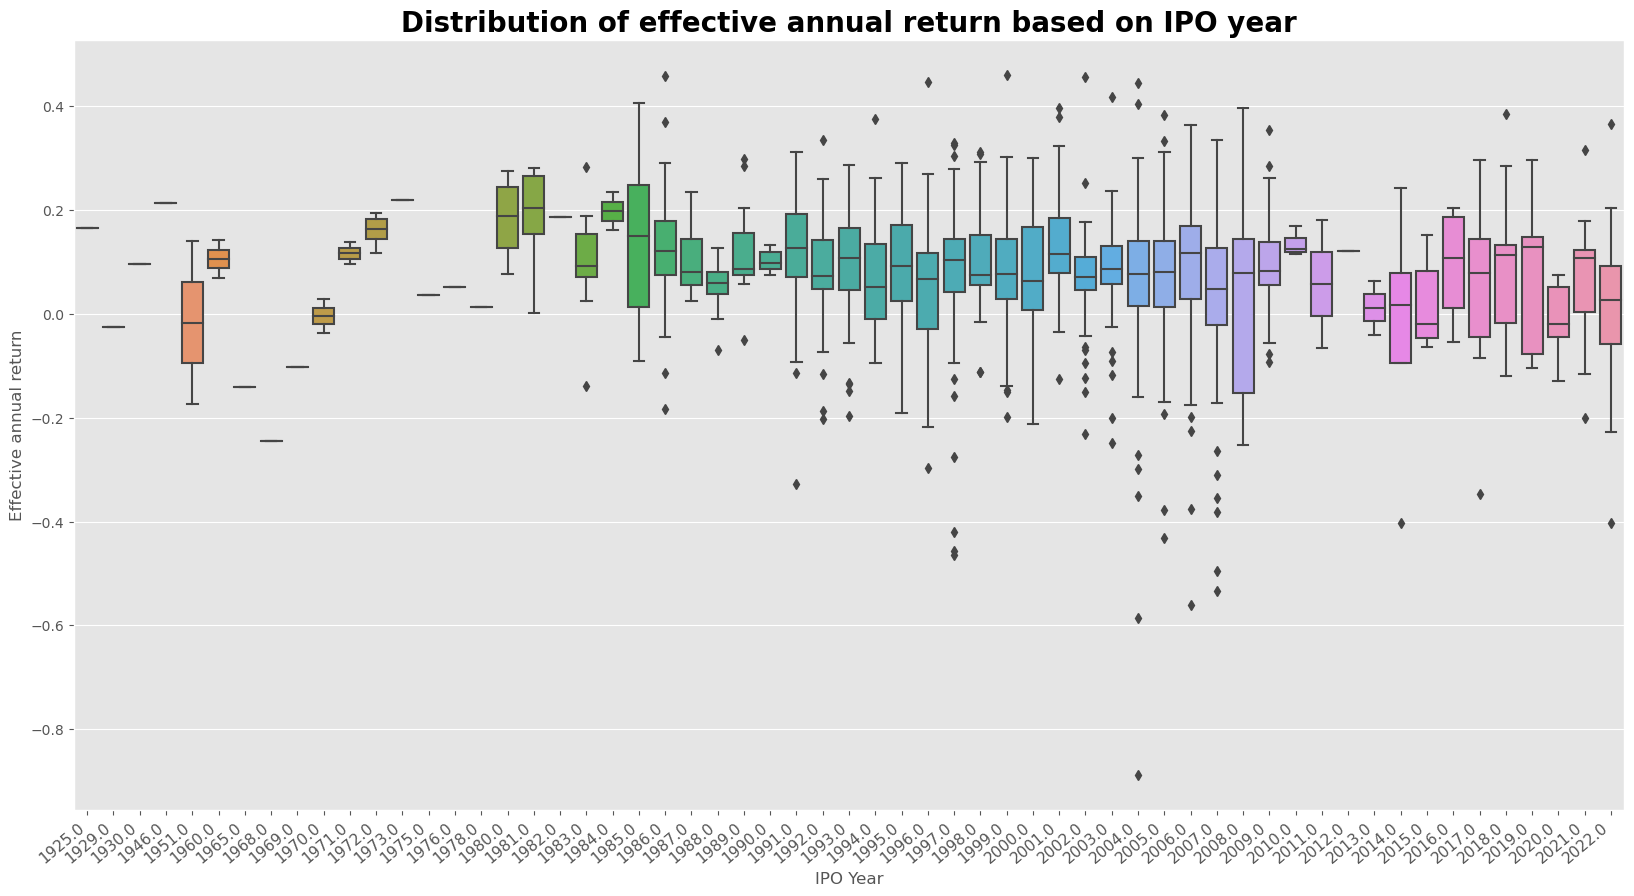

In [10]:
#To note, only 1088 out of 2839 stocks have IPO year available. 
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='IPO Year', y= 'Effective annual return', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=11, rotation=40, ha="right")
fig.set_title('Distribution of effective annual return based on IPO year', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

It seems that generally, the earlier the IPO year, the higher the effective annual return.

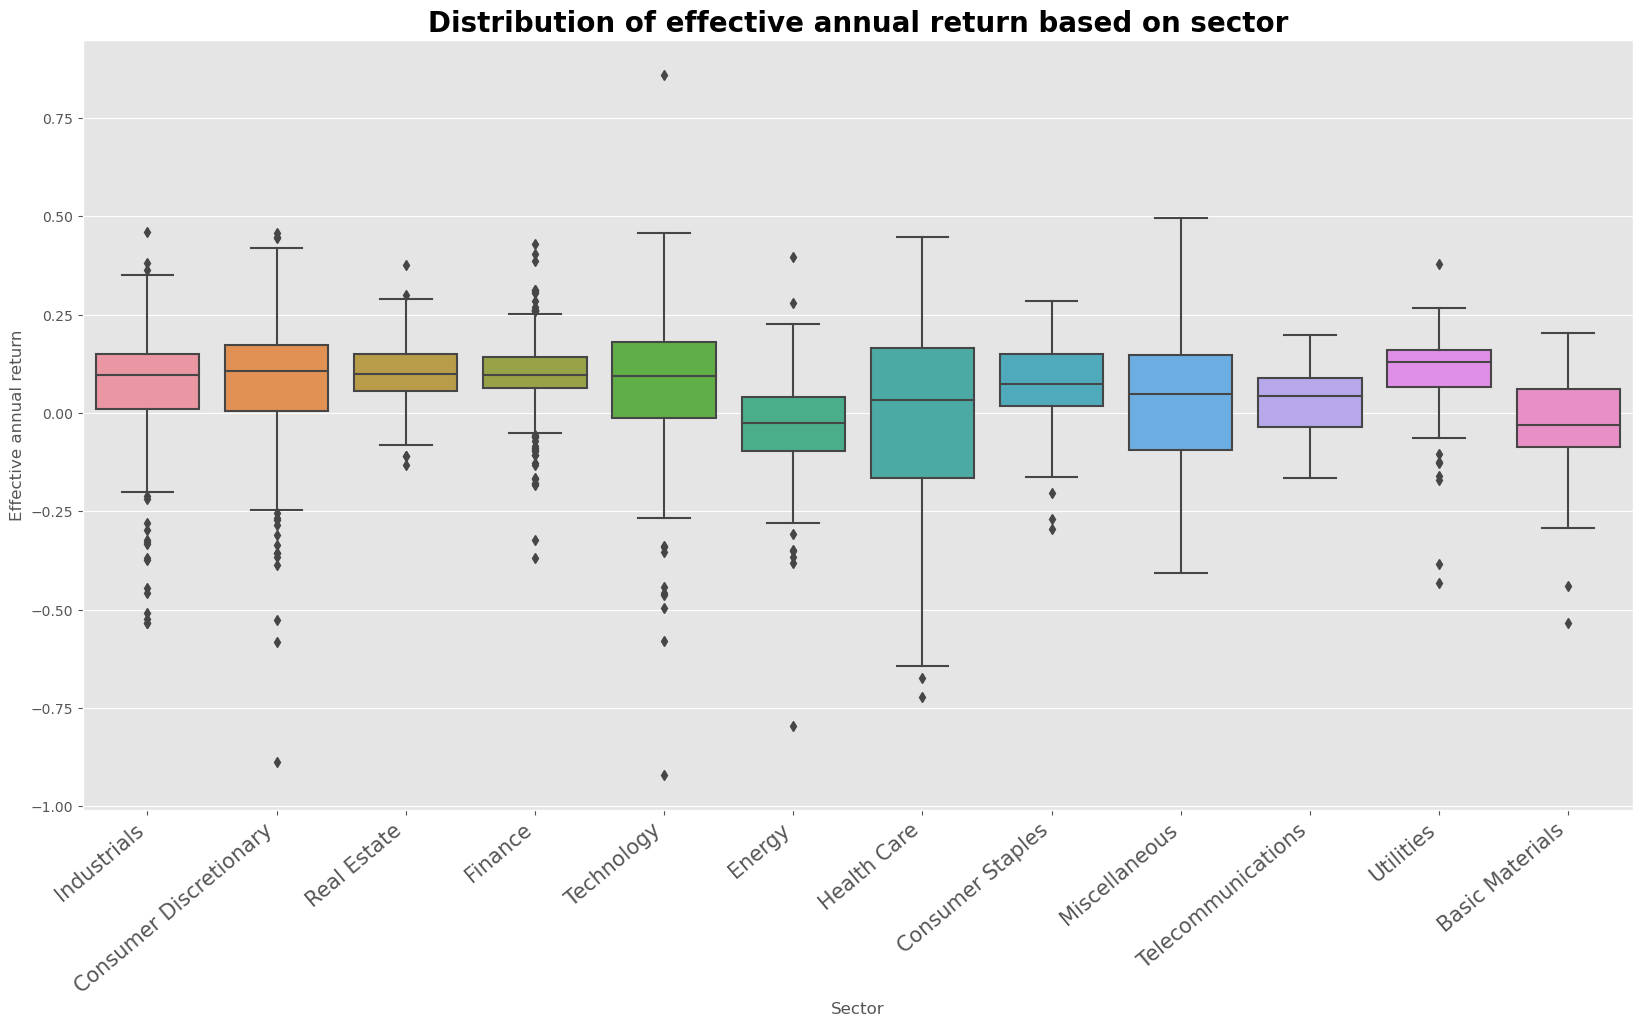

In [11]:
#To note, 165 out of 2839 stocks do not have the sector feature available. 
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'Effective annual return', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_title('Distribution of effective annual return based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Energy and Basic Materials are the only sectors where the median return is negative. We also see that Technology stocks have the widest range of returns.

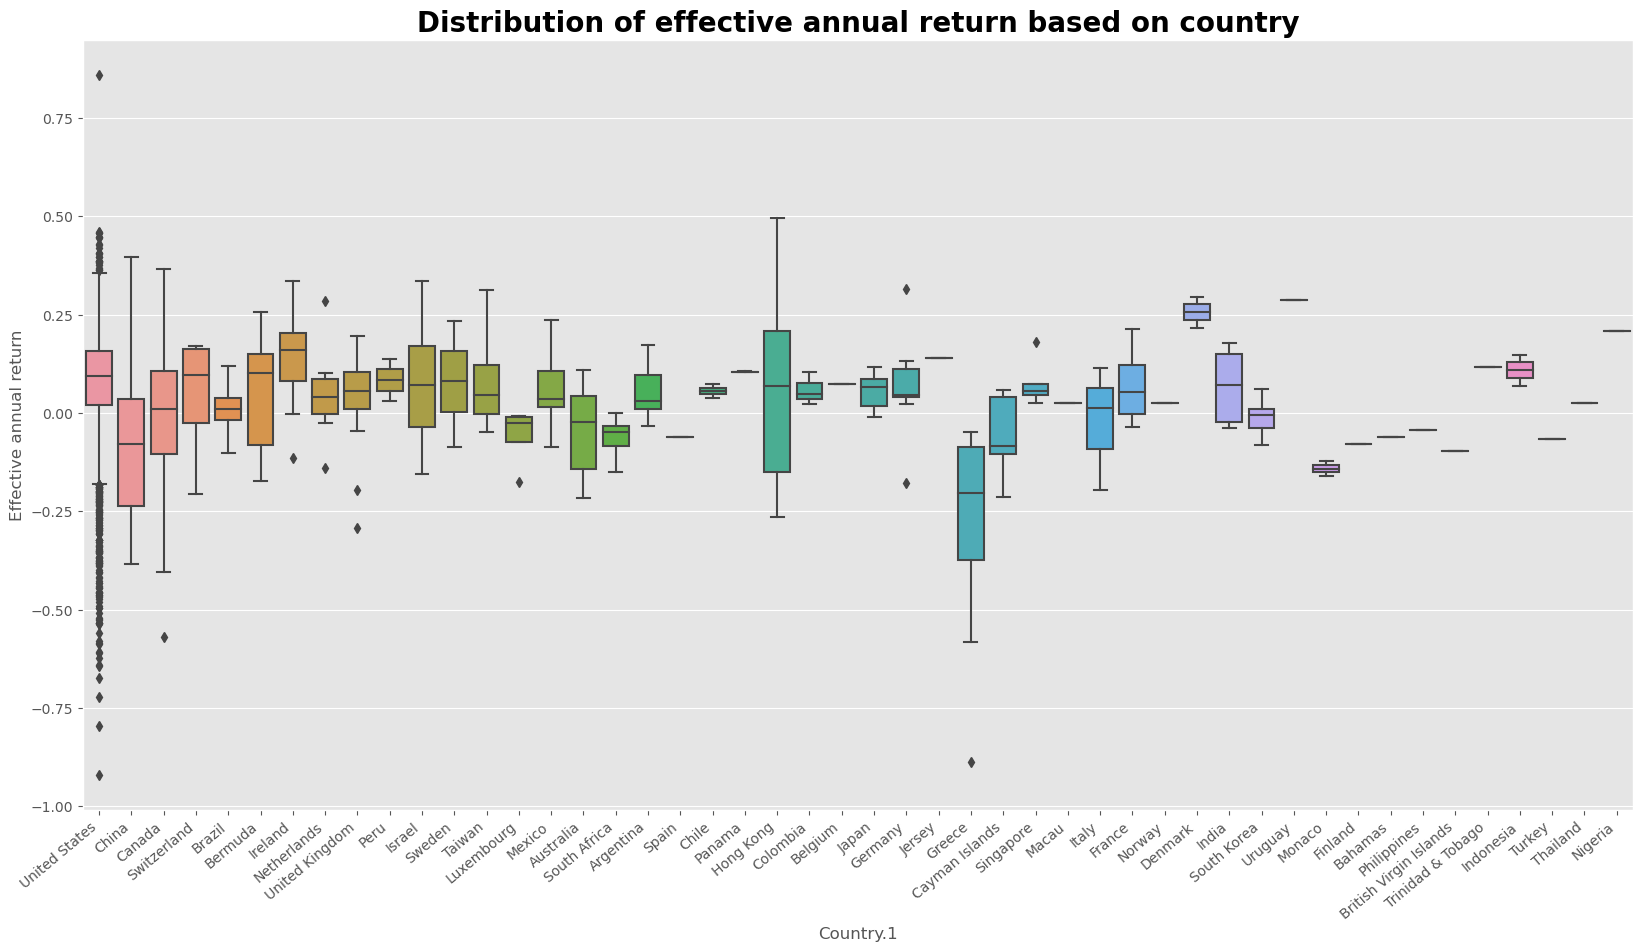

In [47]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Country.1', y= 'Effective annual return', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=10, rotation=40, ha="right")
fig.set_title('Distribution of effective annual return based on country', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

In [48]:
stockdata['Country.1'].value_counts()

United States             2394
Canada                     122
United Kingdom              39
China                       31
Israel                      31
Bermuda                     22
Ireland                     20
Japan                       11
Brazil                      11
Switzerland                 10
Greece                      10
Hong Kong                   10
India                        9
Mexico                       9
Germany                      9
Netherlands                  8
Taiwan                       8
Australia                    8
South Korea                  7
France                       7
South Africa                 6
Argentina                    6
Singapore                    5
Cayman Islands               5
Sweden                       4
Luxembourg                   4
Italy                        3
Colombia                     3
Panama                       2
Peru                         2
Chile                        2
Spain                        2
Indonesi

Stocks from the United States have the highest number of outliers, which is partly due to the relatively high number of stocks from the United States.

[Text(0.5, 1.0, 'Total revenue')]

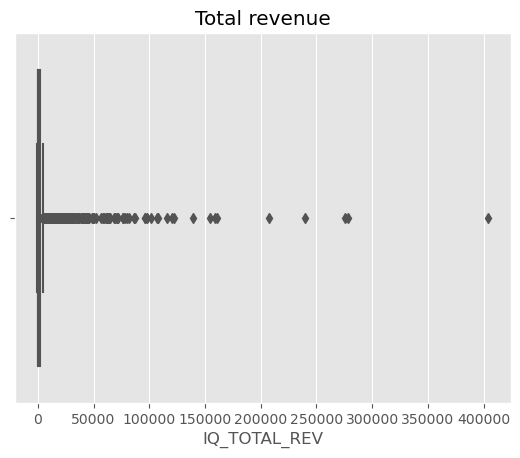

In [13]:
# Let's look at the distribution of the fundamental data features.
sns.boxplot(x='IQ_TOTAL_REV',data=stockdata).set(title='Total revenue')

Text(0.5, 1.0, 'Effective annual return against total revenue')

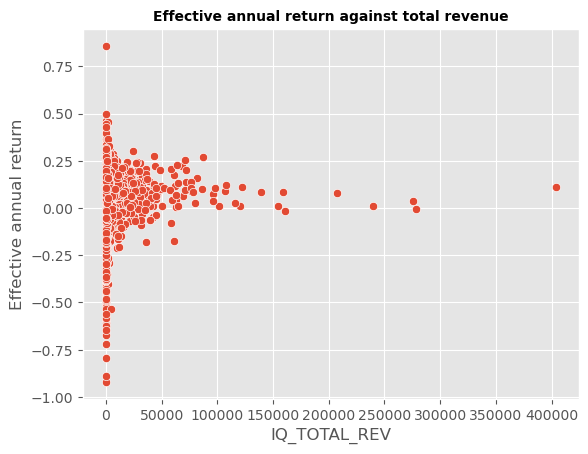

In [14]:
fig=sns.scatterplot(x='IQ_TOTAL_REV', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against total revenue', fontdict={'size': 10, 'weight': 'bold'})

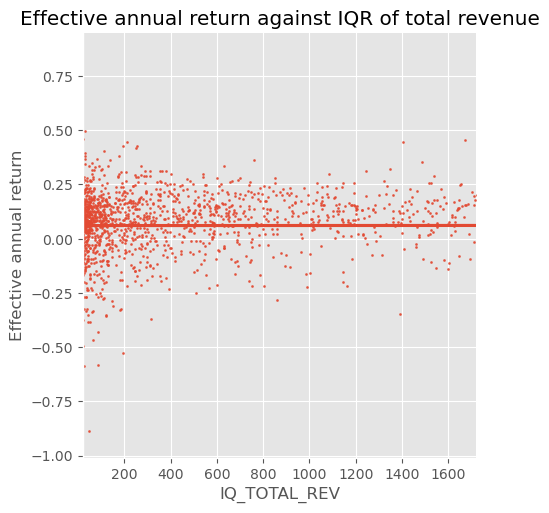

In [15]:
fig=sns.lmplot(x='IQ_TOTAL_REV', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_TOTAL_REV'],[25,75]))
fig.set(title='Effective annual return against IQR of total revenue')

We see that the the box of the revenue boxplot (interquartile range from 25th to 75th percentile) is very narrow. The interquartile range for total revenue extends from USD21m to USD1.72bn. 

We also see a generally increasing trend in the scatterplot, indicating that higher revenue predicts higher effective annual returns.

It might be interesting to look at the effective annual returns of stocks that are considered as outliers based on revenue.

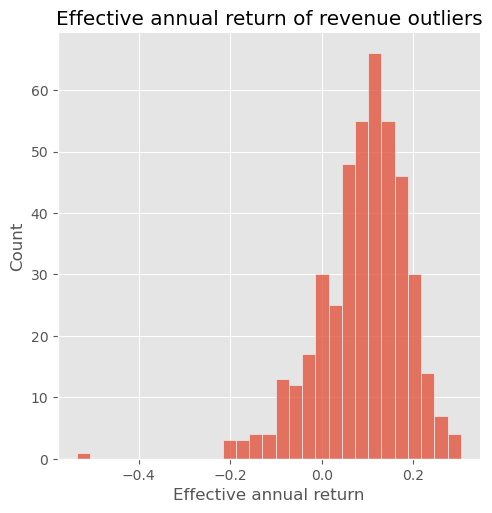

In [16]:
sns.displot(x='Effective annual return', data=stockdata[stockdata['IQ_TOTAL_REV']>1720.057+1.5*(1720.057-21.414165)]).set(title='Effective annual return of revenue outliers')

The 10-year effective annual returns seem to be generally strong for these companies with high revenues. Revenue might therefore be a good predictor of returns.

In [17]:
stockdata[stockdata['IQ_TOTAL_REV']<21.414165-1.5*(1720.057-21.414165)]

Empty DataFrame
Columns: [Symbol, longName, Name, IPO Year, Sector, Effective annual return, CIQ ID, Ticker, Country.1, Short Business Description, IQ_TOTAL_REV, IQ_RETURN_ASSETS, IQ_RETURN_EQUITY, IQ_GROSS_MARGIN, IQ_EBITDA_MARGIN, IQ_NI_MARGIN, IQ_AUDITOR_OPINION, IQ_ASSET_TURNS, IQ_CURRENT_RATIO, IQ_DAYS_SALES_OUT, IQ_DAYS_INVENTORY_OUT, IQ_DAYS_PAYABLE_OUT, IQ_TOTAL_DEBT_EQUITY, IQ_TOTAL_REV_1YR_ANN_GROWTH, IQ_NI_1YR_ANN_GROWTH, IQ_CFO_1YR_ANN_GROWTH, IQ_TOTAL_ASSETS_1YR_ANN_GROWTH, IQ_EBITDA, IQ_PAYOUT_RATIO, IQ_CASH_ST_INVEST, IQ_NPPE, IQ_GW, IQ_RE, IQ_TBV, IQ_NET_DEBT, IQ_CONTINGENT_LIABILITIES, IQ_CASH_OPER, IQ_CASH_INVEST, IQ_NET_CHANGE]
Index: []

[0 rows x 39 columns]

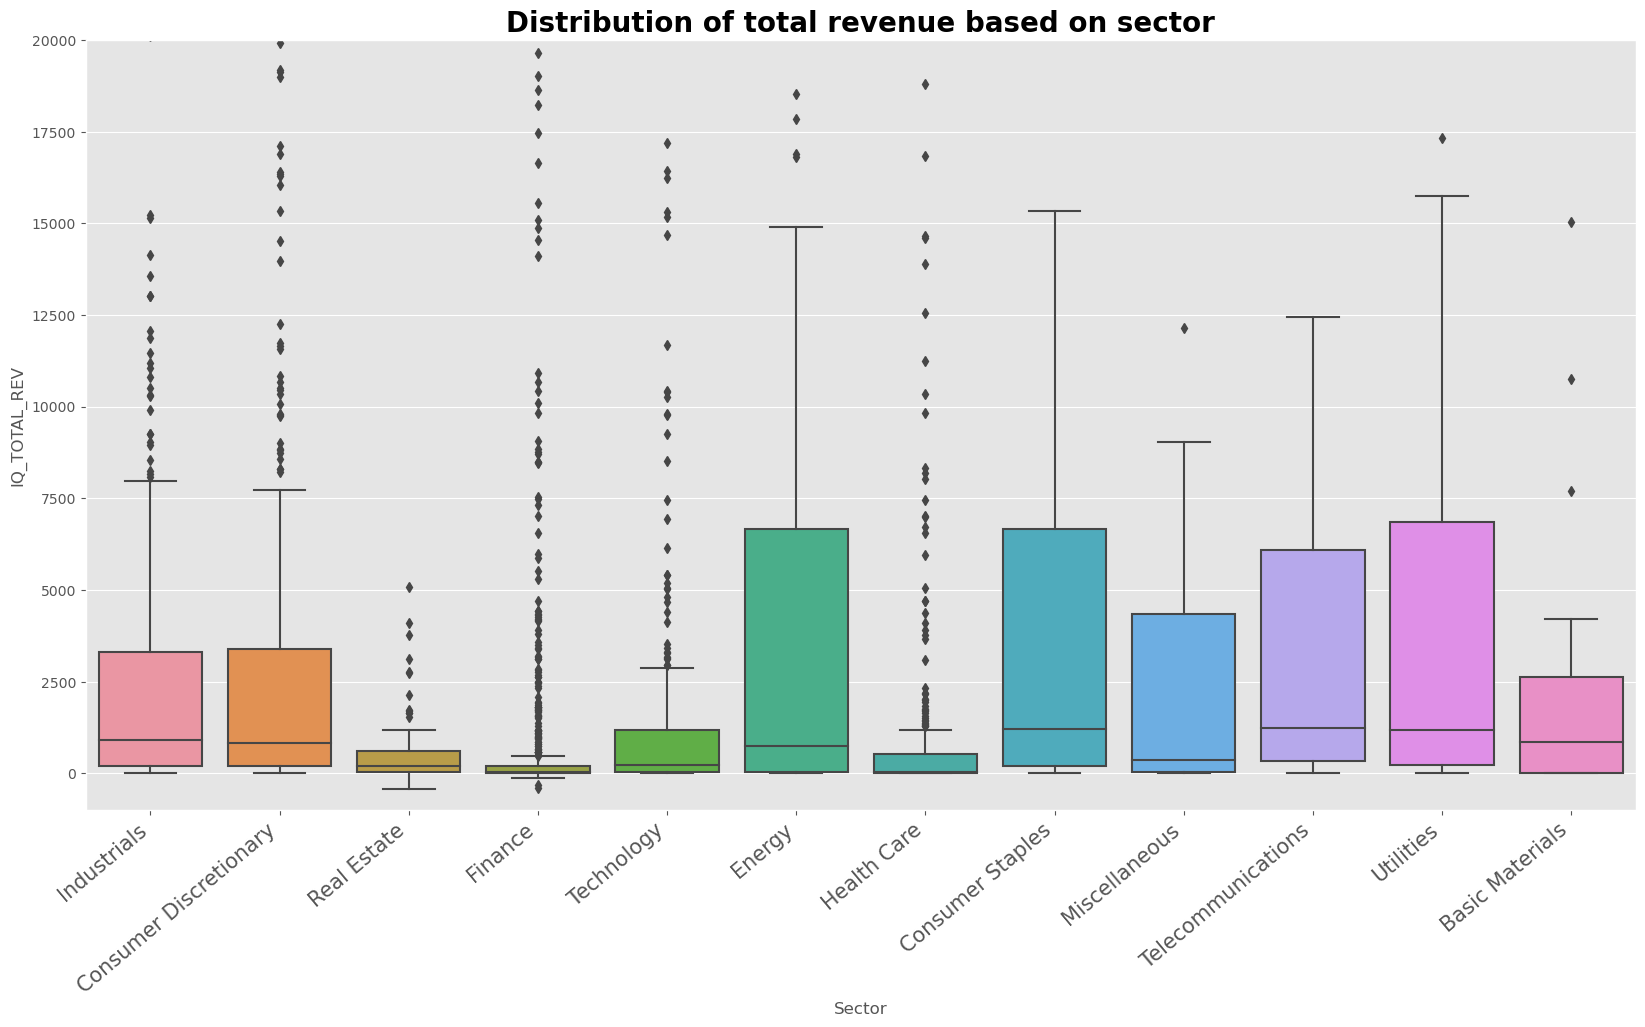

In [18]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_TOTAL_REV', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-1000,20000)
fig.set_title('Distribution of total revenue based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

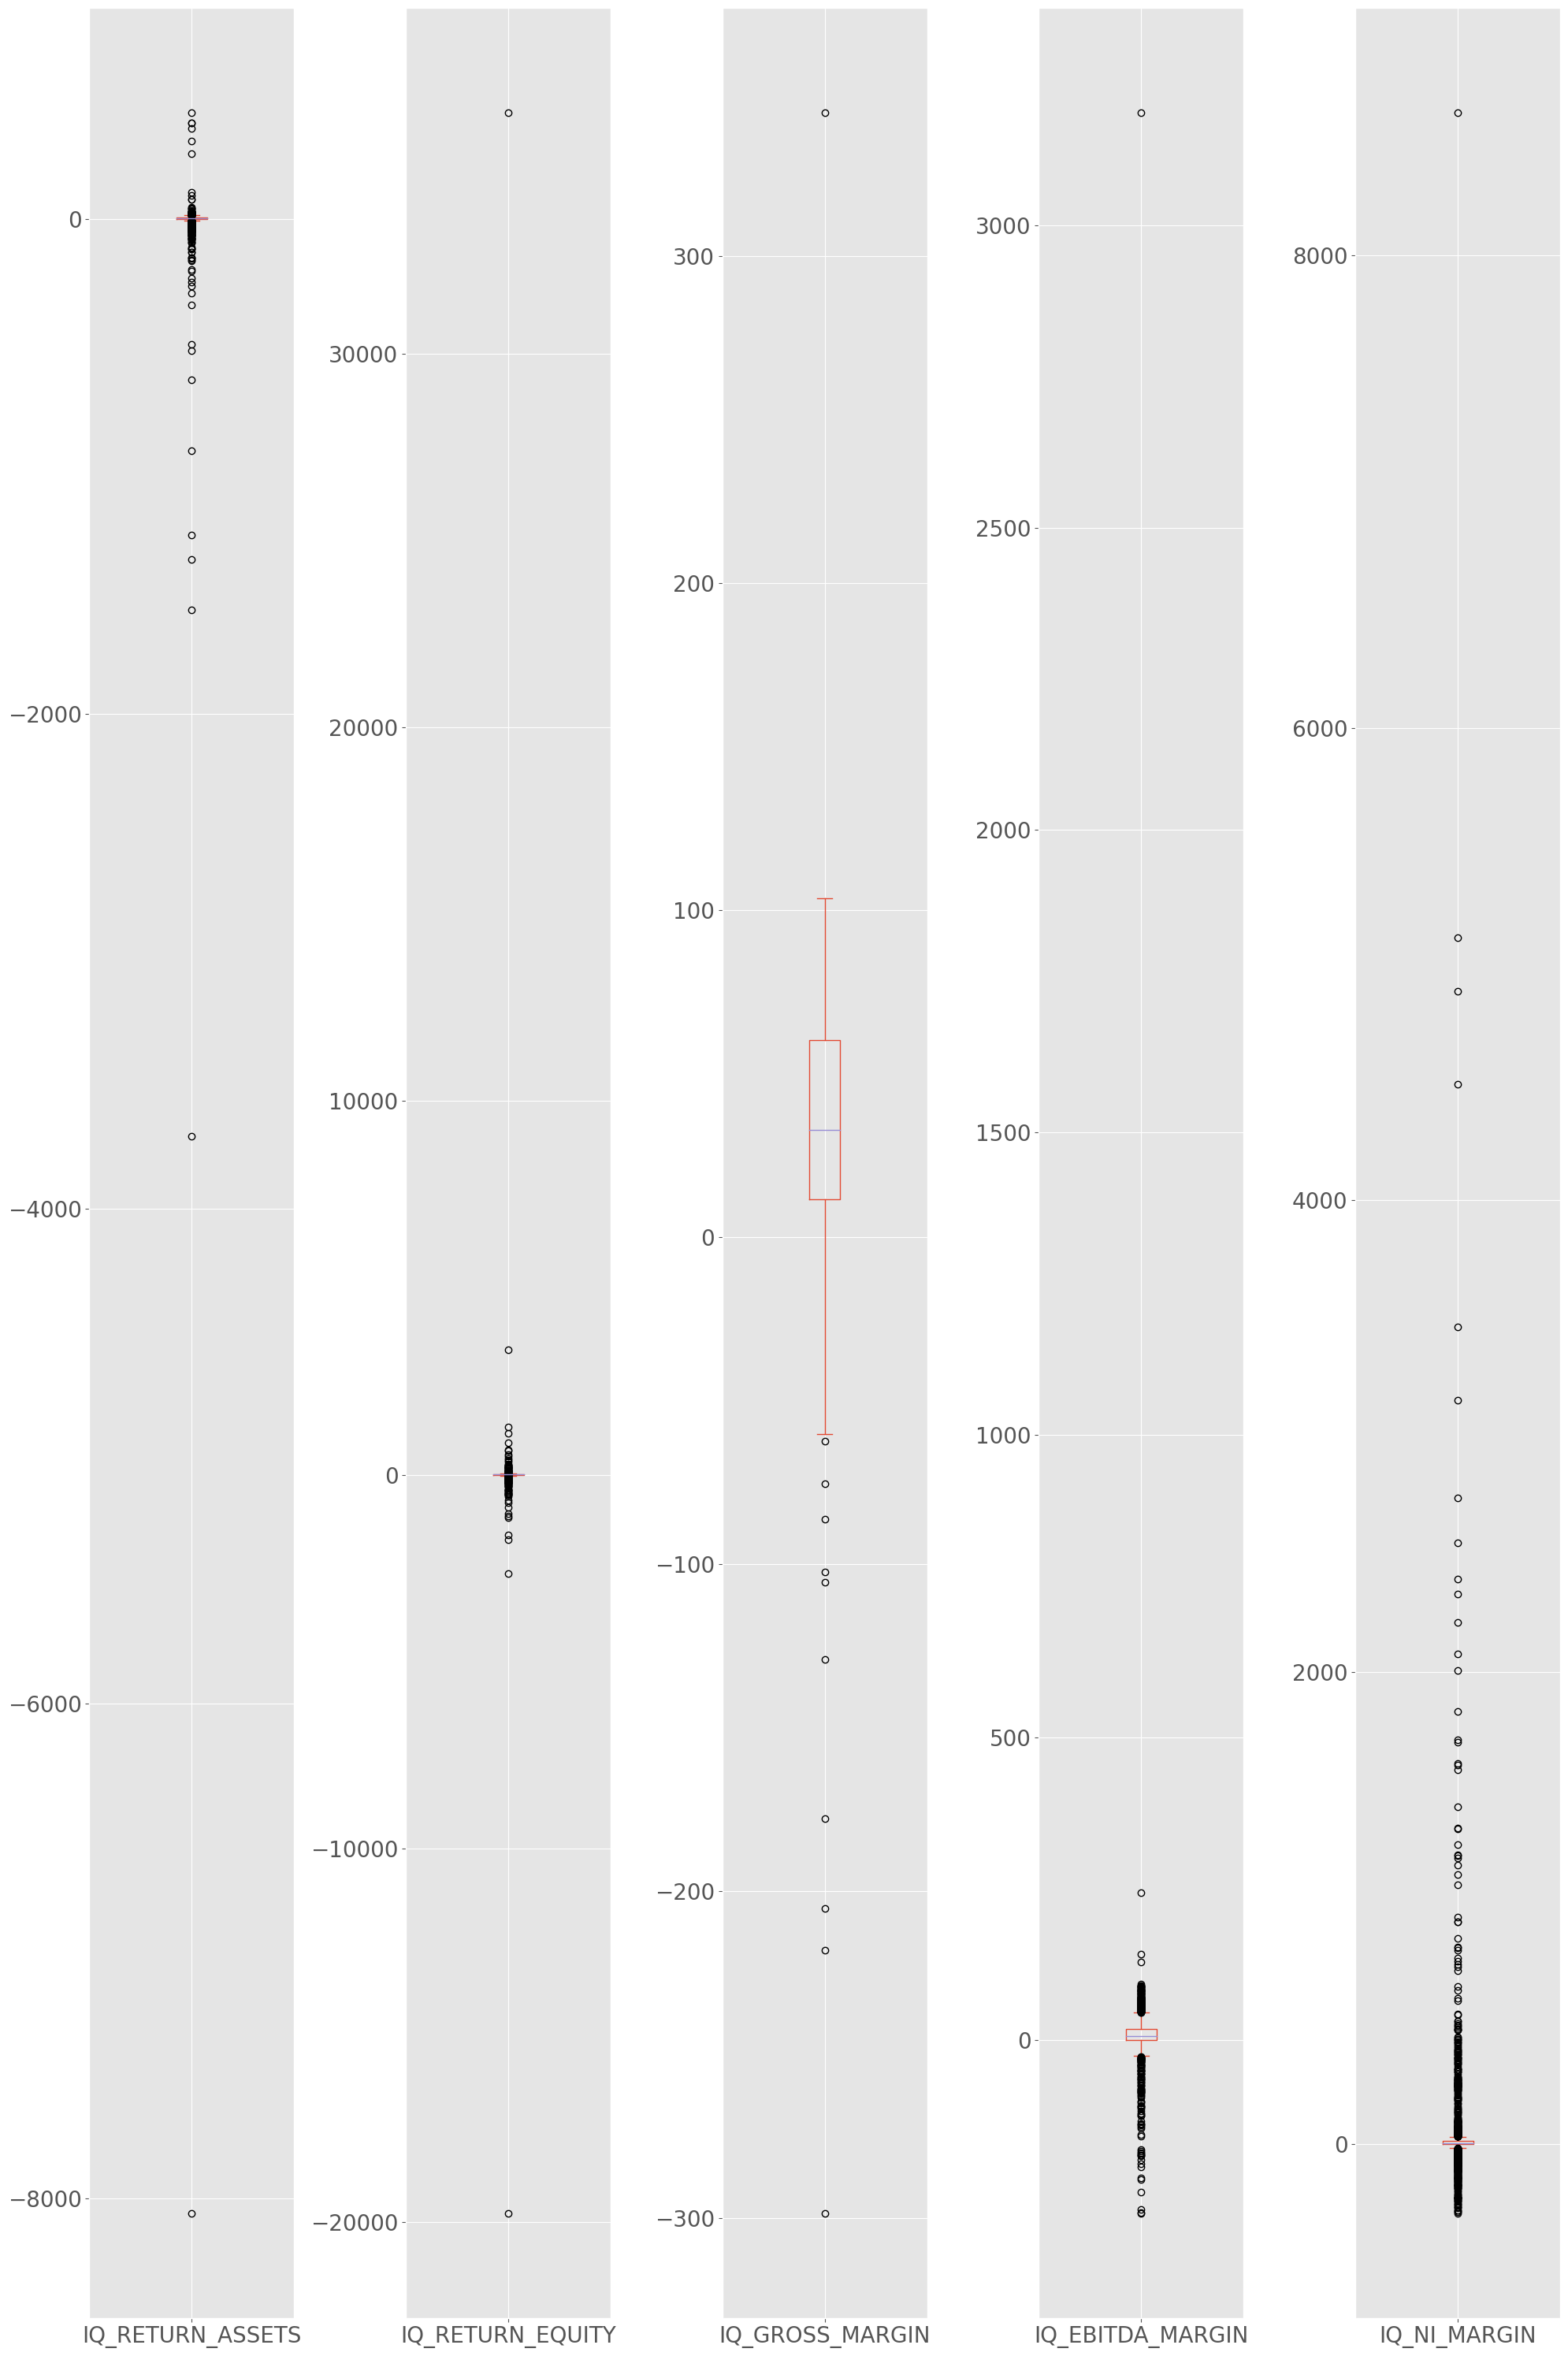

In [19]:
stockdata[['IQ_RETURN_ASSETS','IQ_RETURN_EQUITY','IQ_GROSS_MARGIN','IQ_EBITDA_MARGIN','IQ_NI_MARGIN']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

We see that the interquartile range for the above features are all extremely narrow compared to their full distributions, except for gross margin.

Text(0.5, 1.0, 'Effective annual return against return on assets')

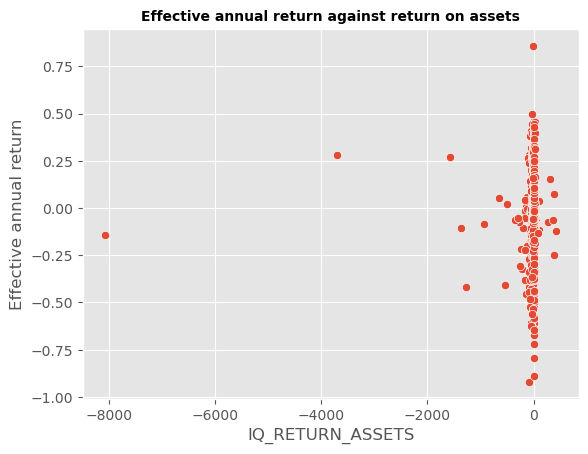

In [20]:
fig=sns.scatterplot(x='IQ_RETURN_ASSETS', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against return on assets', fontdict={'size': 10, 'weight': 'bold'})

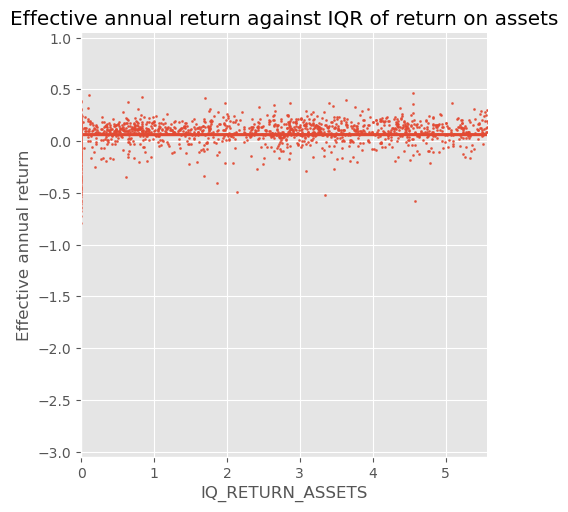

In [21]:
fig=sns.lmplot(x='IQ_RETURN_ASSETS', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_RETURN_ASSETS'],[25,75]))
fig.set(title='Effective annual return against IQR of return on assets')

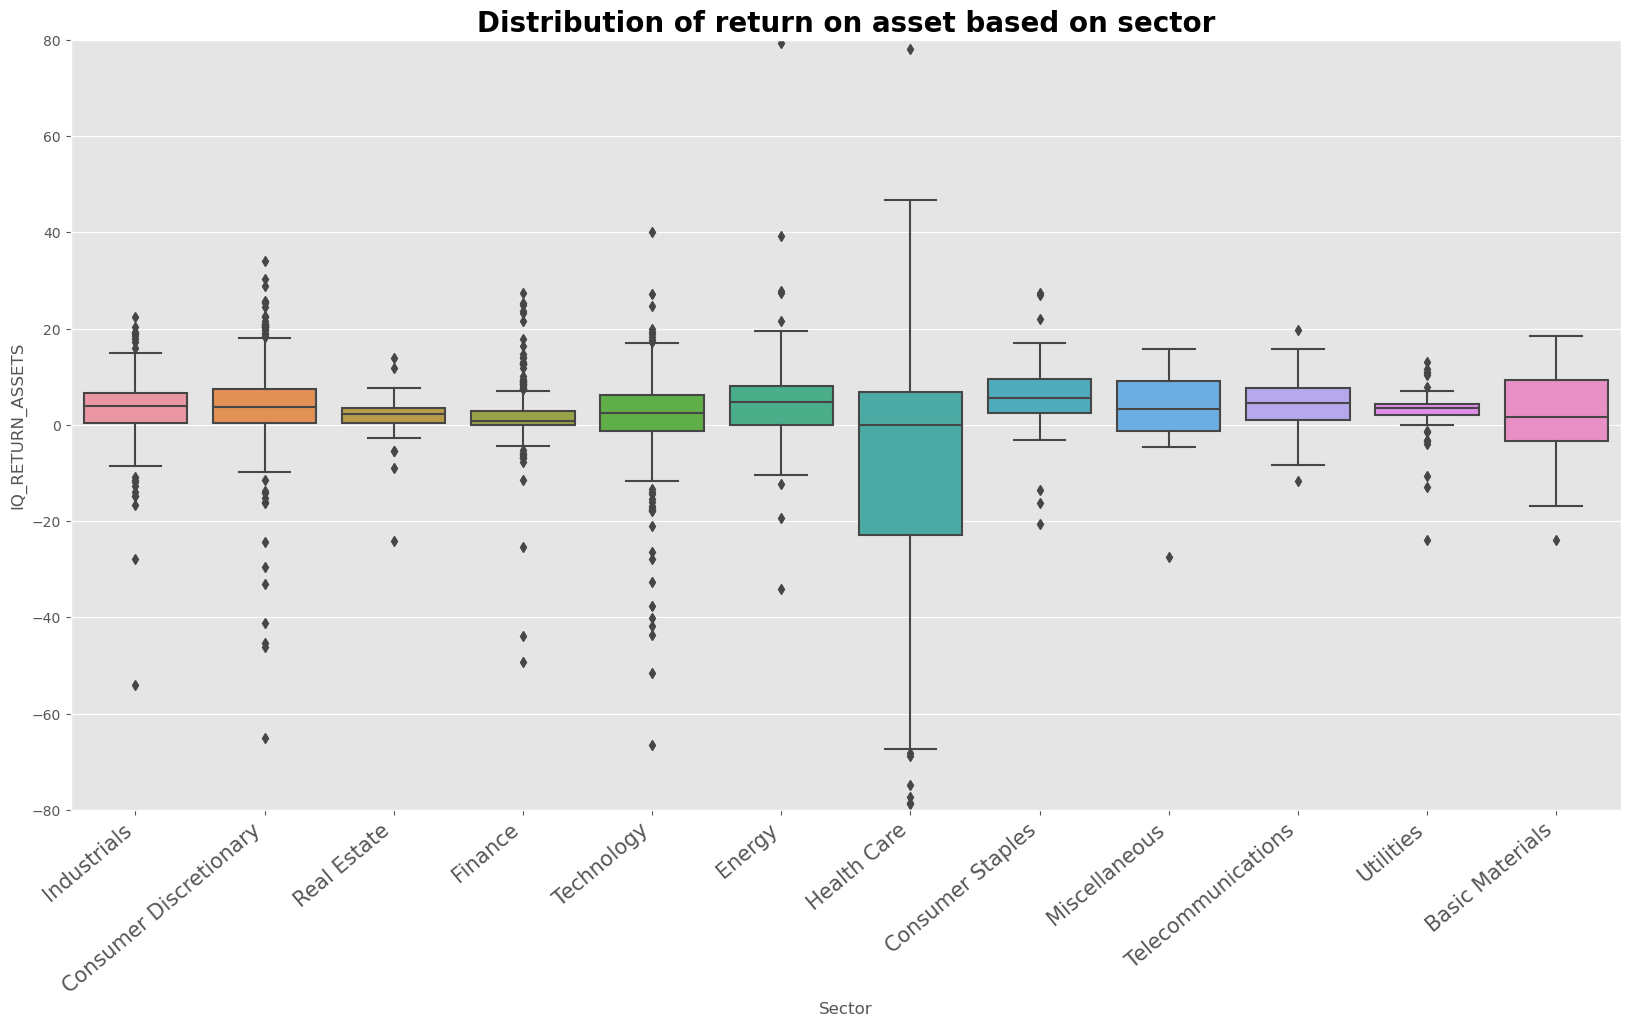

In [22]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_RETURN_ASSETS', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-80,80)
fig.set_title('Distribution of return on asset based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return against return on equity')

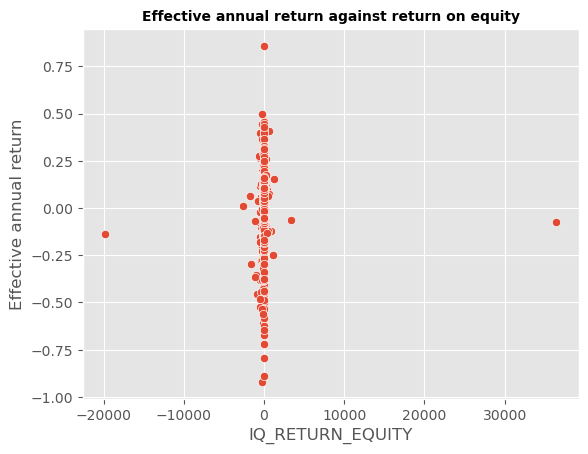

In [23]:
fig=sns.scatterplot(x='IQ_RETURN_EQUITY', y='Effective annual return', data=stockdata)
fig.set_title('Effective annual return against return on equity', fontdict={'size': 10, 'weight': 'bold'})

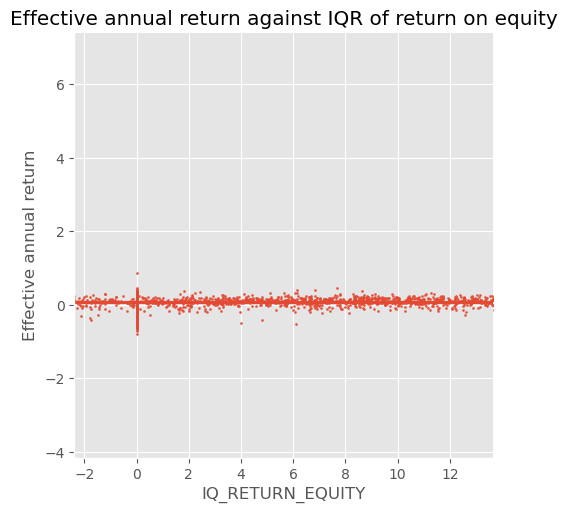

In [24]:
fig=sns.lmplot(x='IQ_RETURN_EQUITY', y='Effective annual return', data=stockdata, scatter_kws={"s": 1})
fig.set(xlim=np.percentile(stockdata['IQ_RETURN_EQUITY'],[25,75]))
fig.set(title='Effective annual return against IQR of return on equity')

We see the "tails" where effective annual return is very negative when return on assets/equity is close to 0, which makes sense. Where return on assets/equity is negative, effective annual return can also be positive.

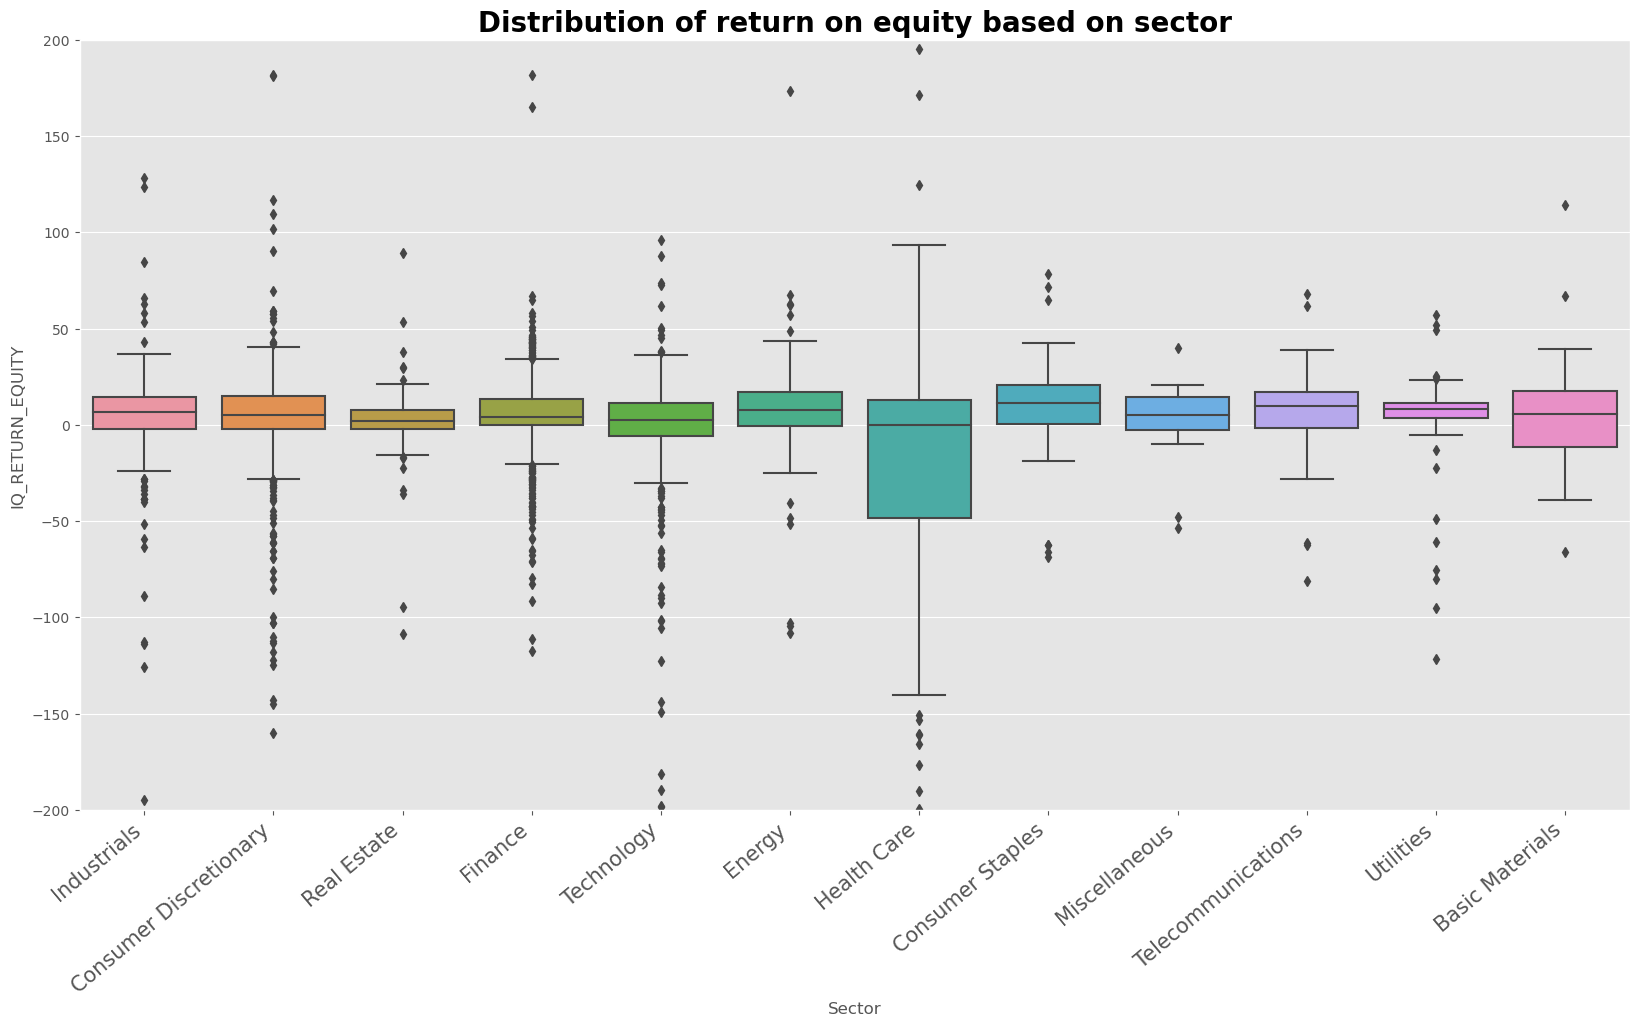

In [25]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_RETURN_EQUITY', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-200,200)
fig.set_title('Distribution of return on equity based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

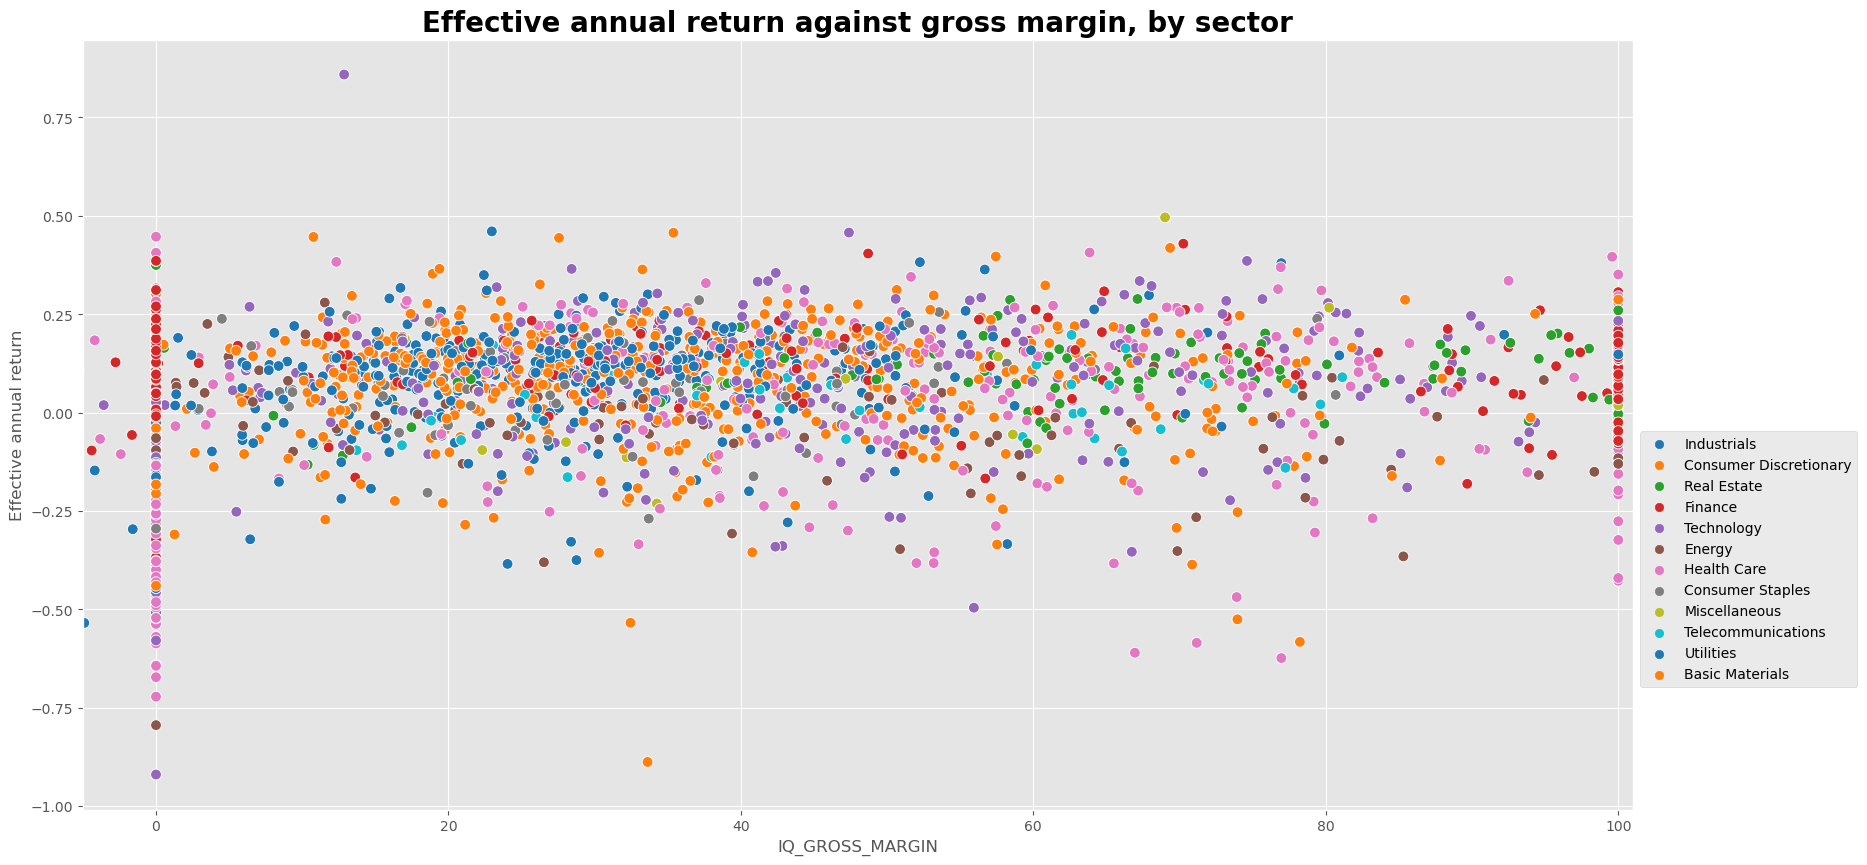

In [26]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_GROSS_MARGIN', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-5,101)
fig.set_title('Effective annual return against gross margin, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

We see a concentration of finance stocks with gross margin of either 0% or 100%.

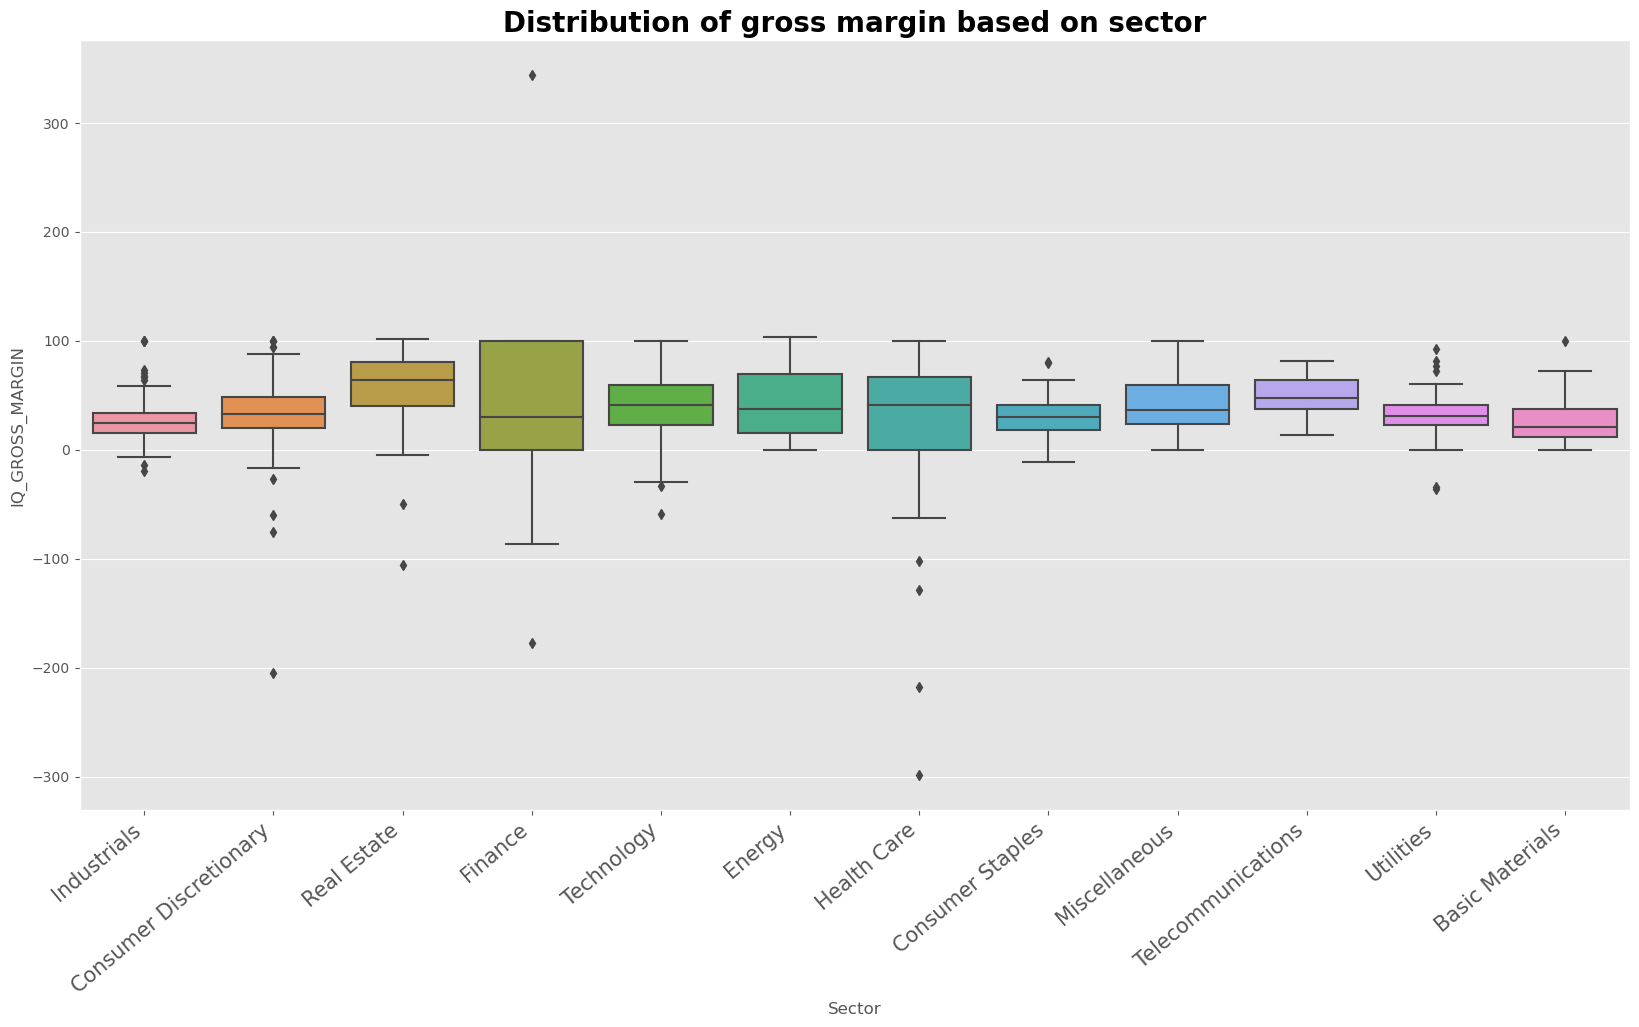

In [27]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_GROSS_MARGIN', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_title('Distribution of gross margin based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

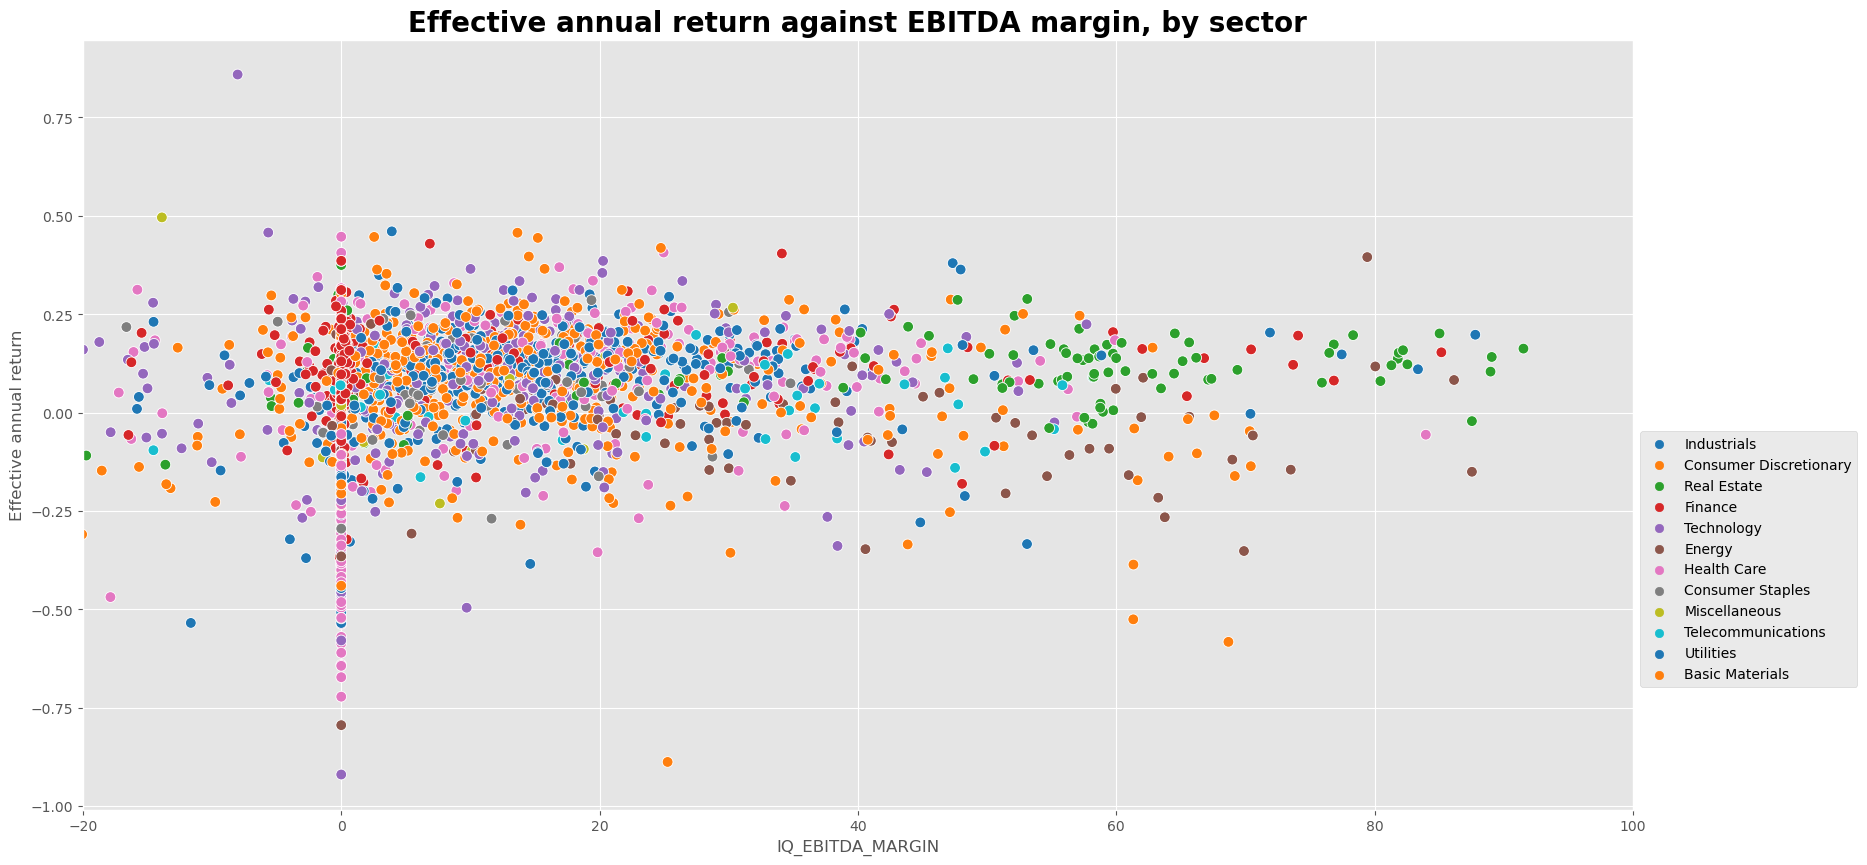

In [28]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_EBITDA_MARGIN', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-20,100)
fig.set_title('Effective annual return against EBITDA margin, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

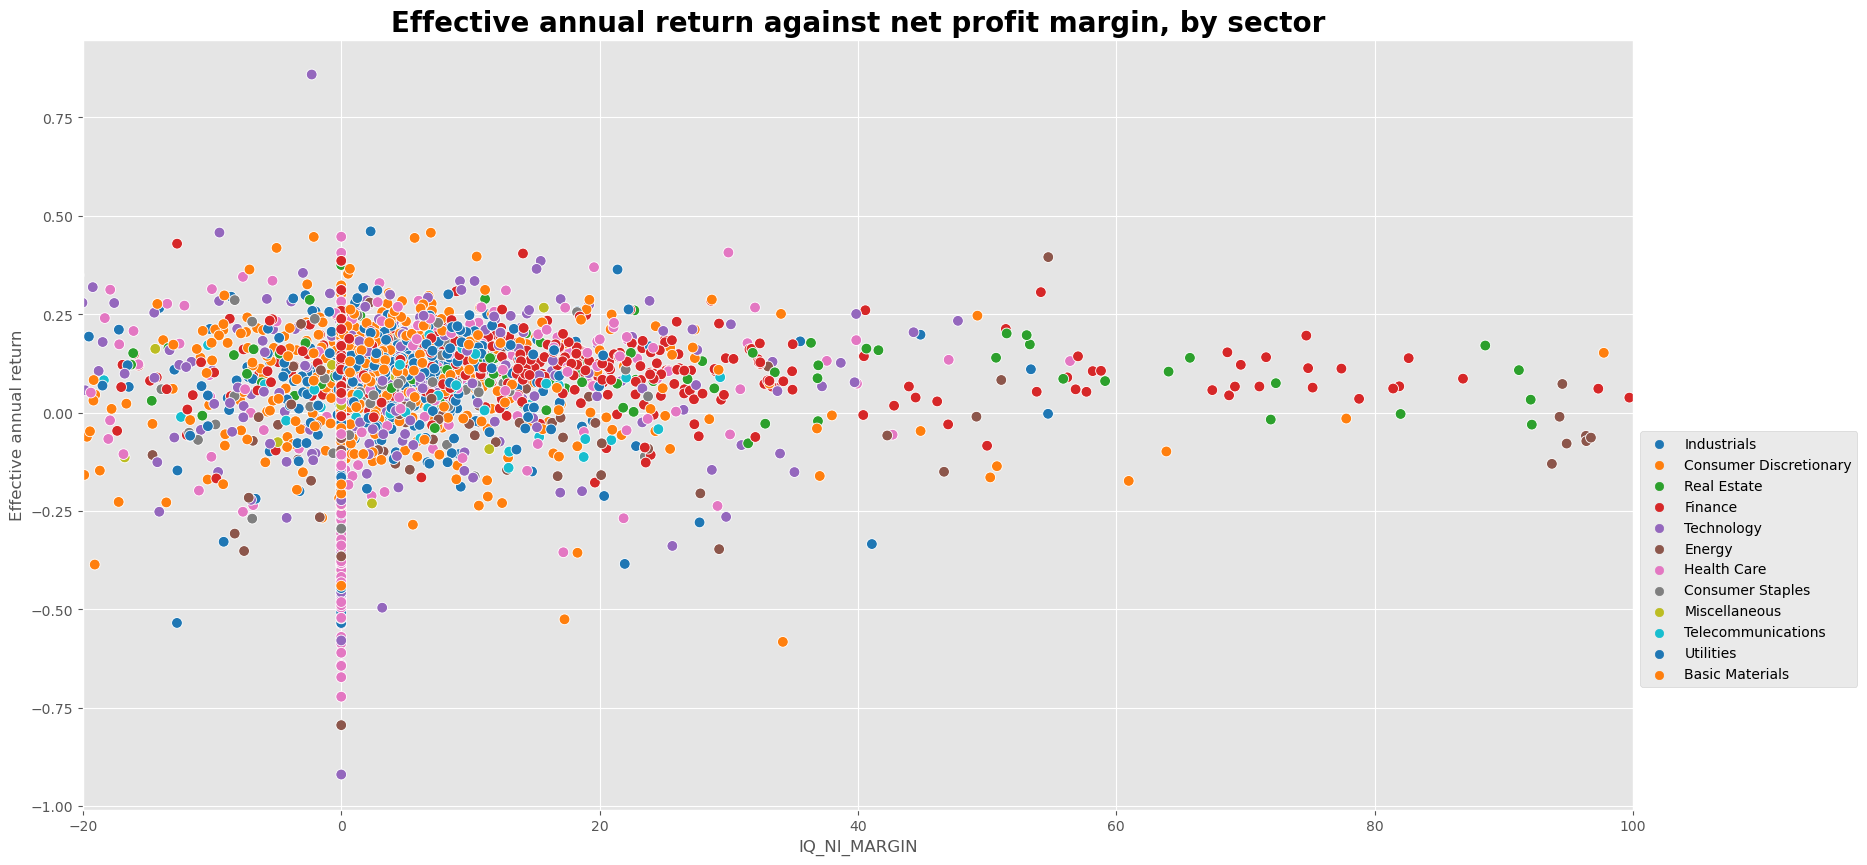

In [29]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_NI_MARGIN', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-20,100)
fig.set_title('Effective annual return against net profit margin, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

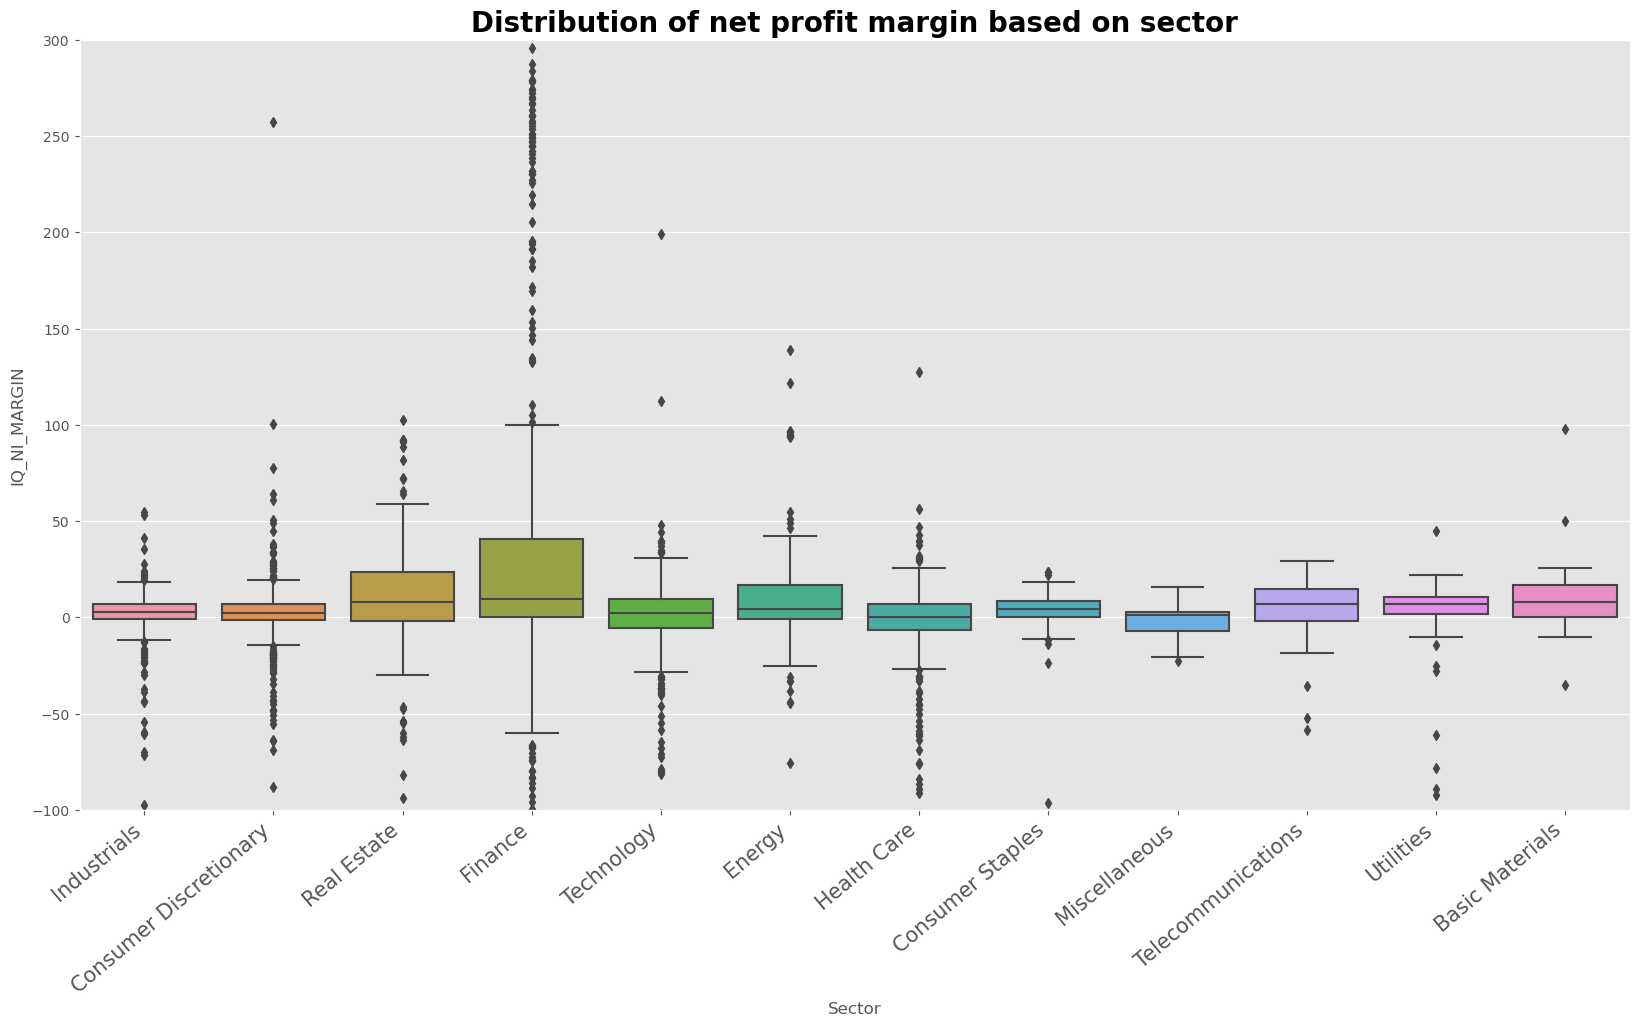

In [30]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_NI_MARGIN', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-100,300)
fig.set_title('Distribution of net profit margin based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

Text(0.5, 1.0, 'Effective annual return, by auditor opinion')

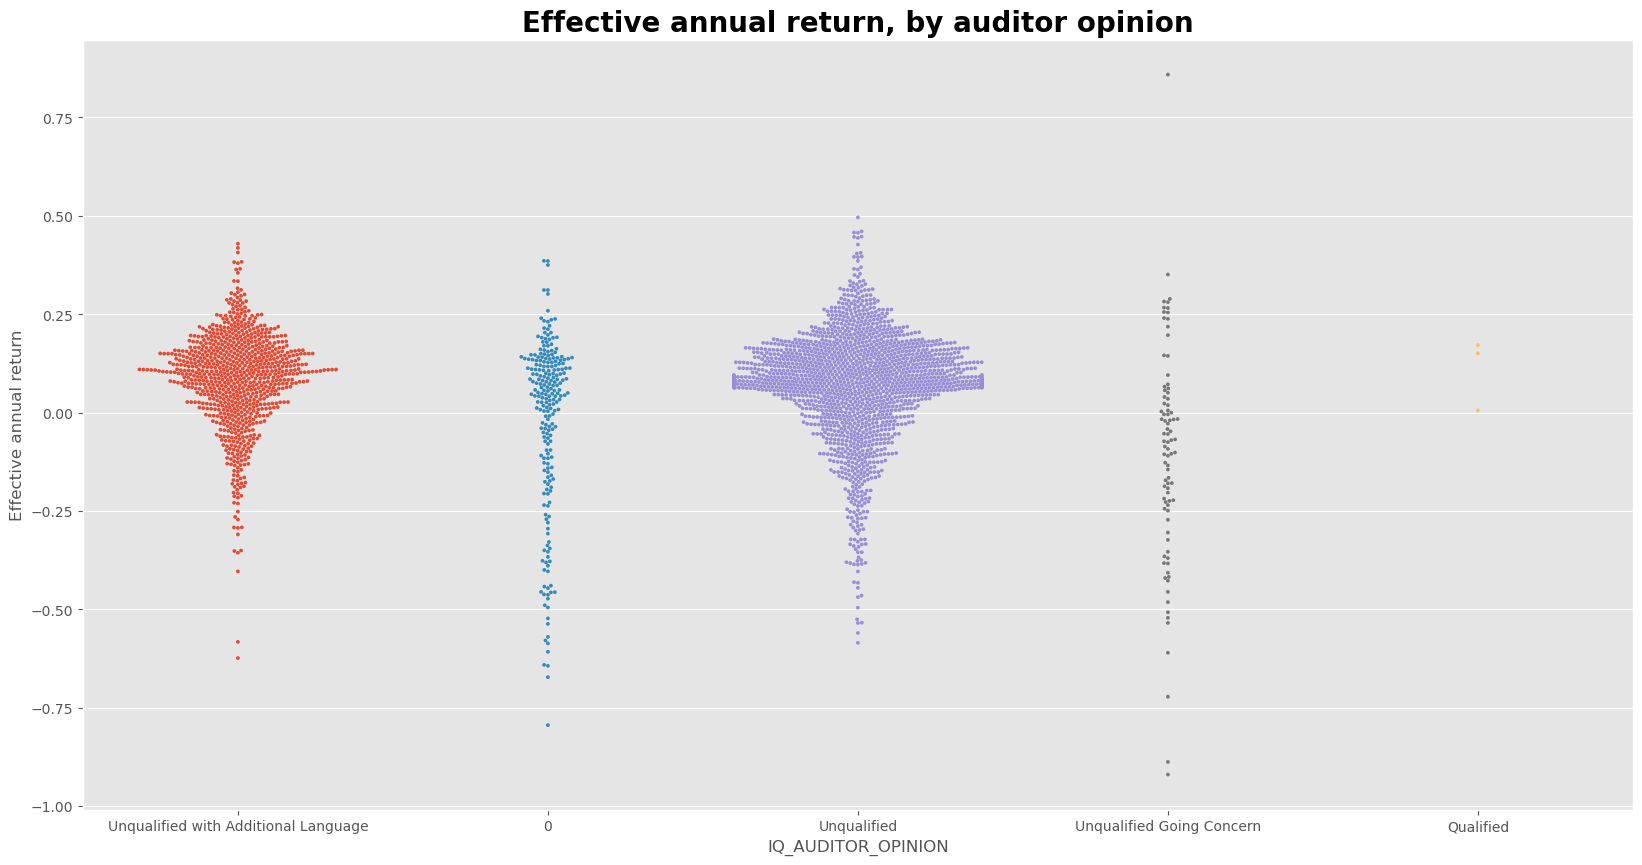

In [31]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='IQ_AUDITOR_OPINION', y='Effective annual return', data=stockdata, size=2.7).set_title('Effective annual return, by auditor opinion', fontdict={'size': 20, 'weight': 'bold'})

It is interesting to note that there were only 3 stocks with qualified opinions. We see also that for stocks with going concern issues, effective annual return tends to be more negative. 

(-100.0, 100.0)

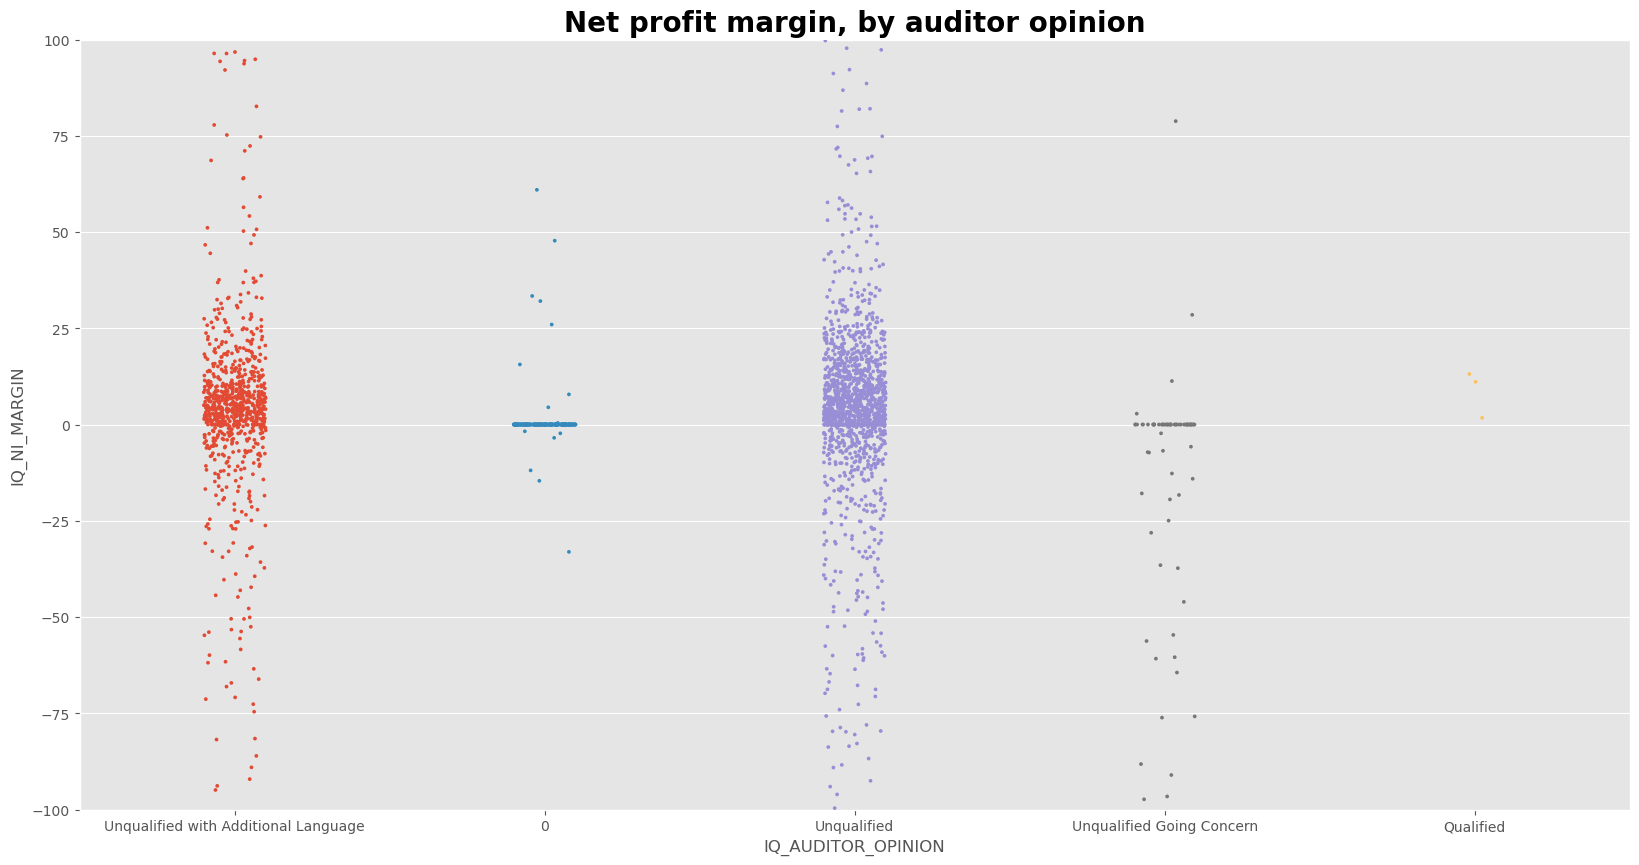

In [32]:
plt.figure(figsize=(20,10))
fig=sns.stripplot(x='IQ_AUDITOR_OPINION', y='IQ_NI_MARGIN', data=stockdata, size=2.7)
fig.set_title('Net profit margin, by auditor opinion', fontdict={'size': 20, 'weight': 'bold'})
fig.set_ylim(-100,100)

Stocks with going concern issues tend to have negative net profit margins.

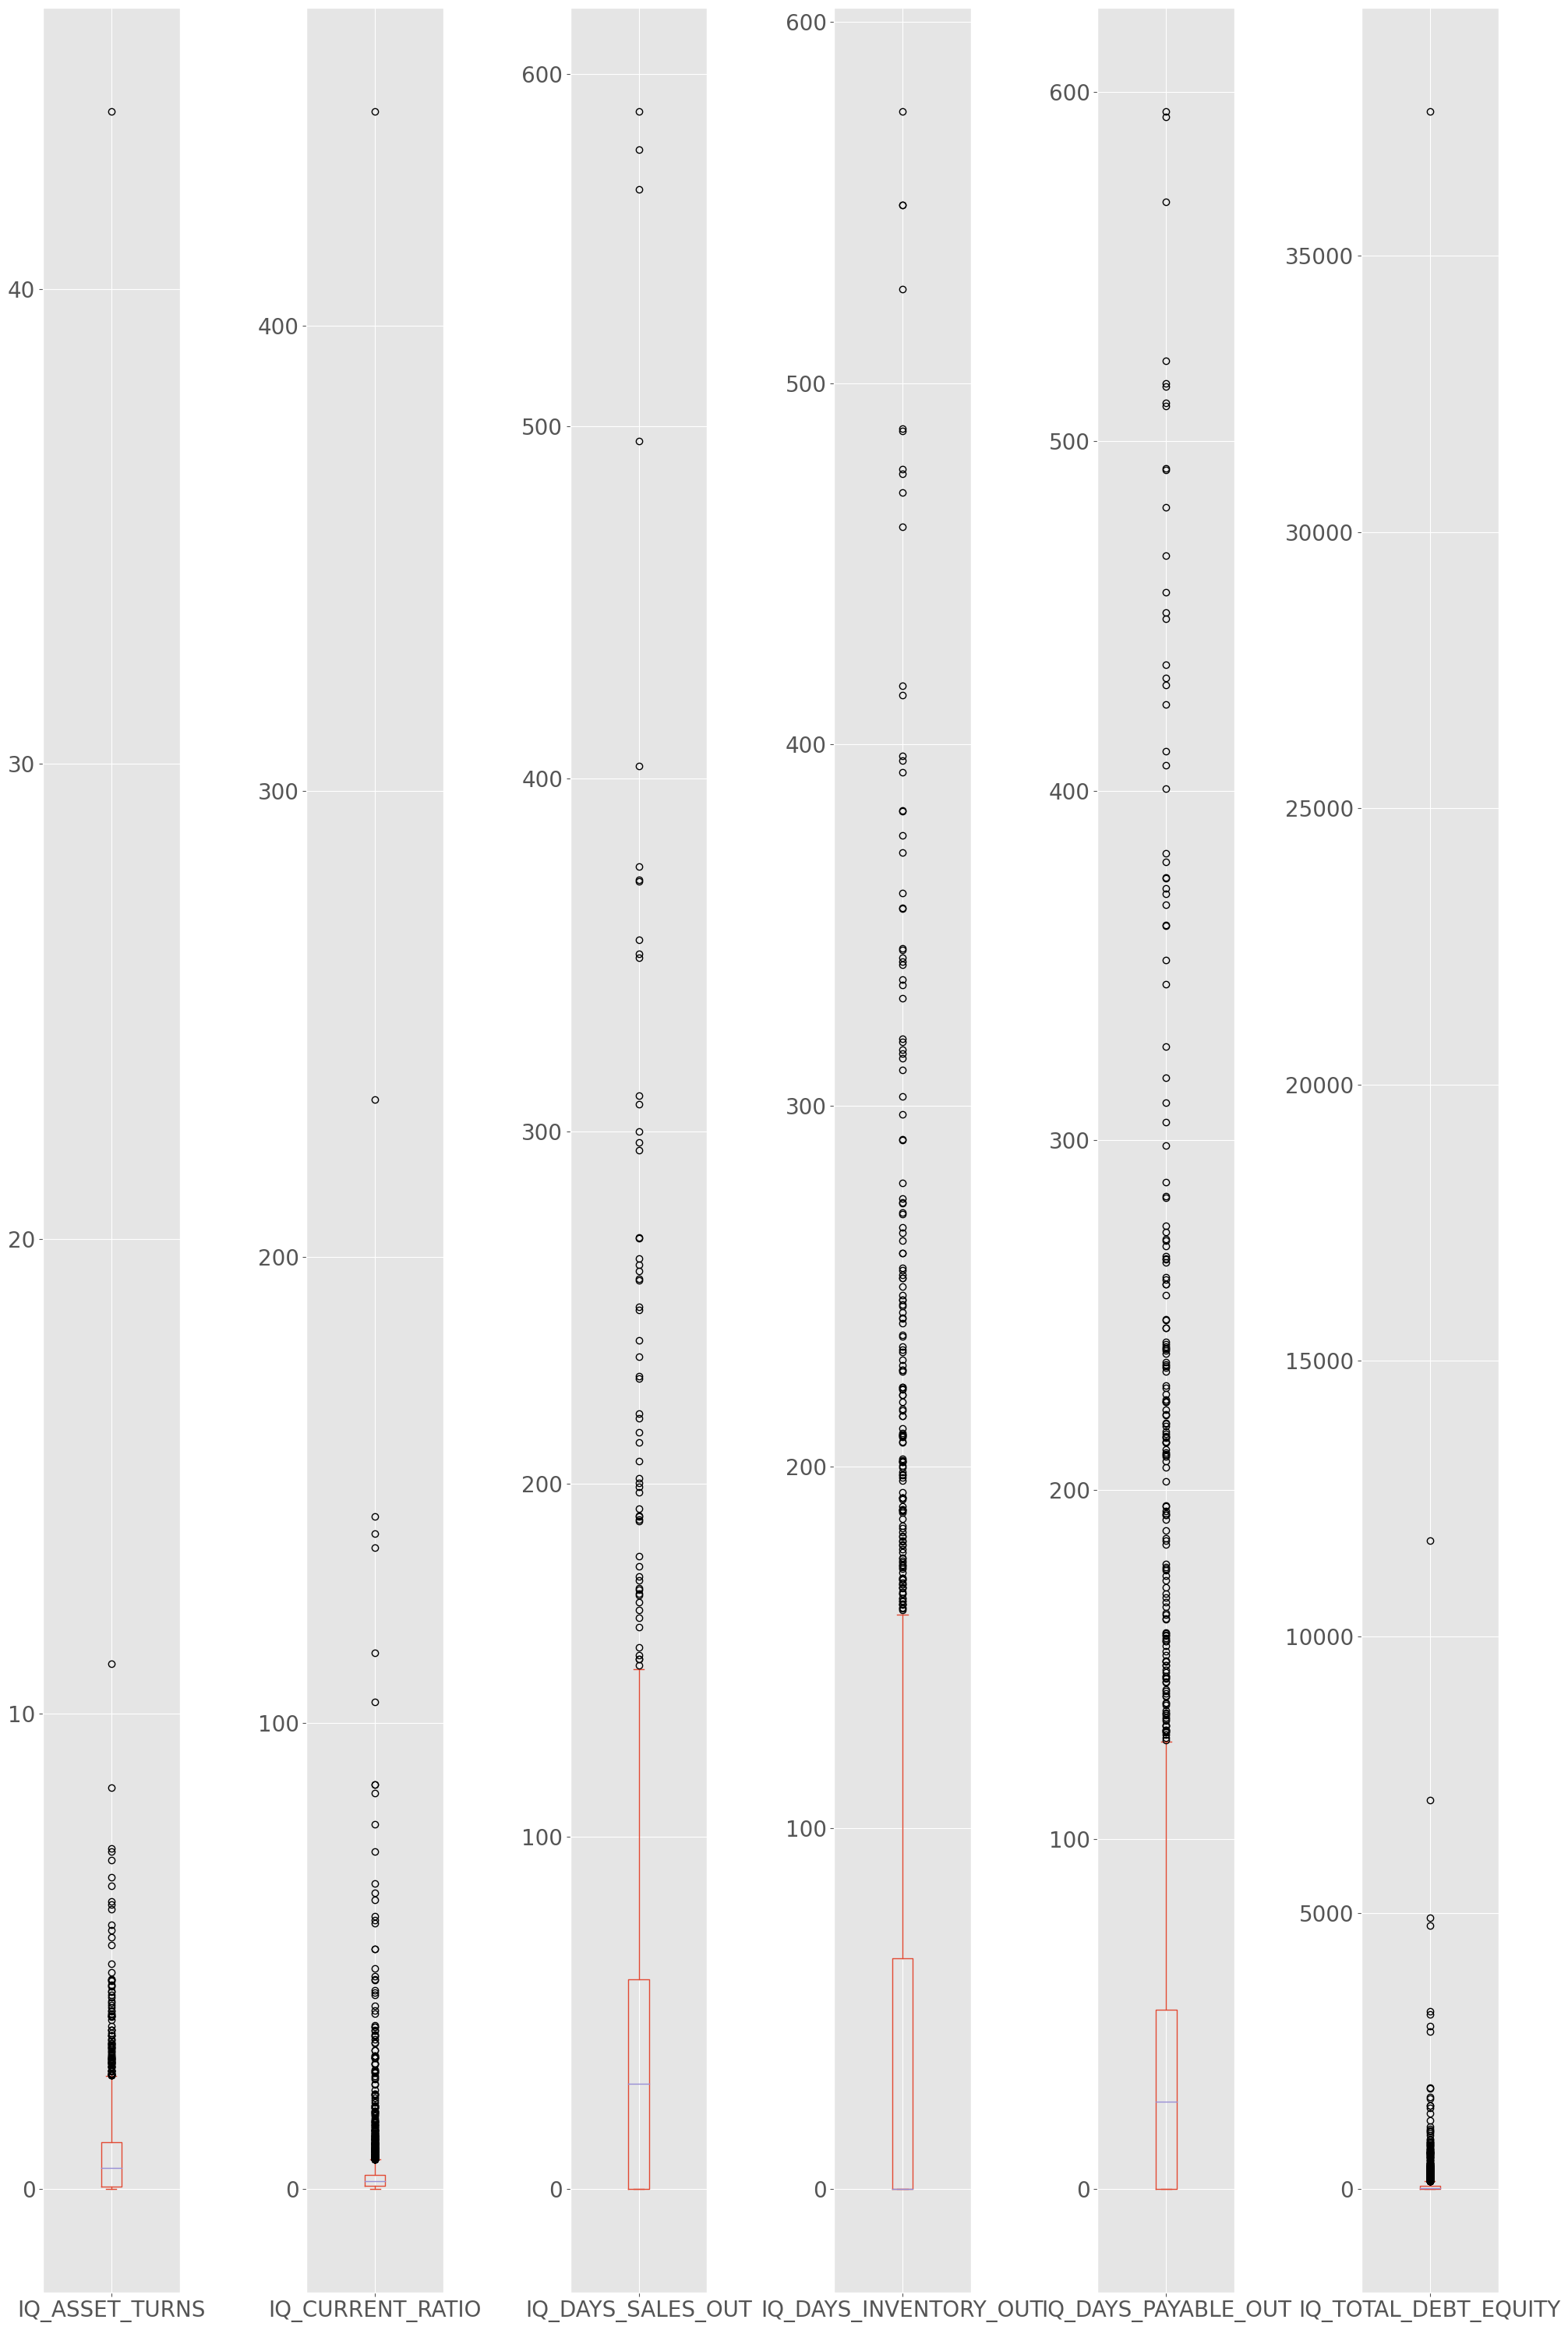

In [33]:
stockdata[['IQ_ASSET_TURNS','IQ_CURRENT_RATIO','IQ_DAYS_SALES_OUT','IQ_DAYS_INVENTORY_OUT','IQ_DAYS_PAYABLE_OUT','IQ_TOTAL_DEBT_EQUITY']].plot(kind='box', subplots=True, figsize=(20,30), fontsize=20)
plt.tight_layout()

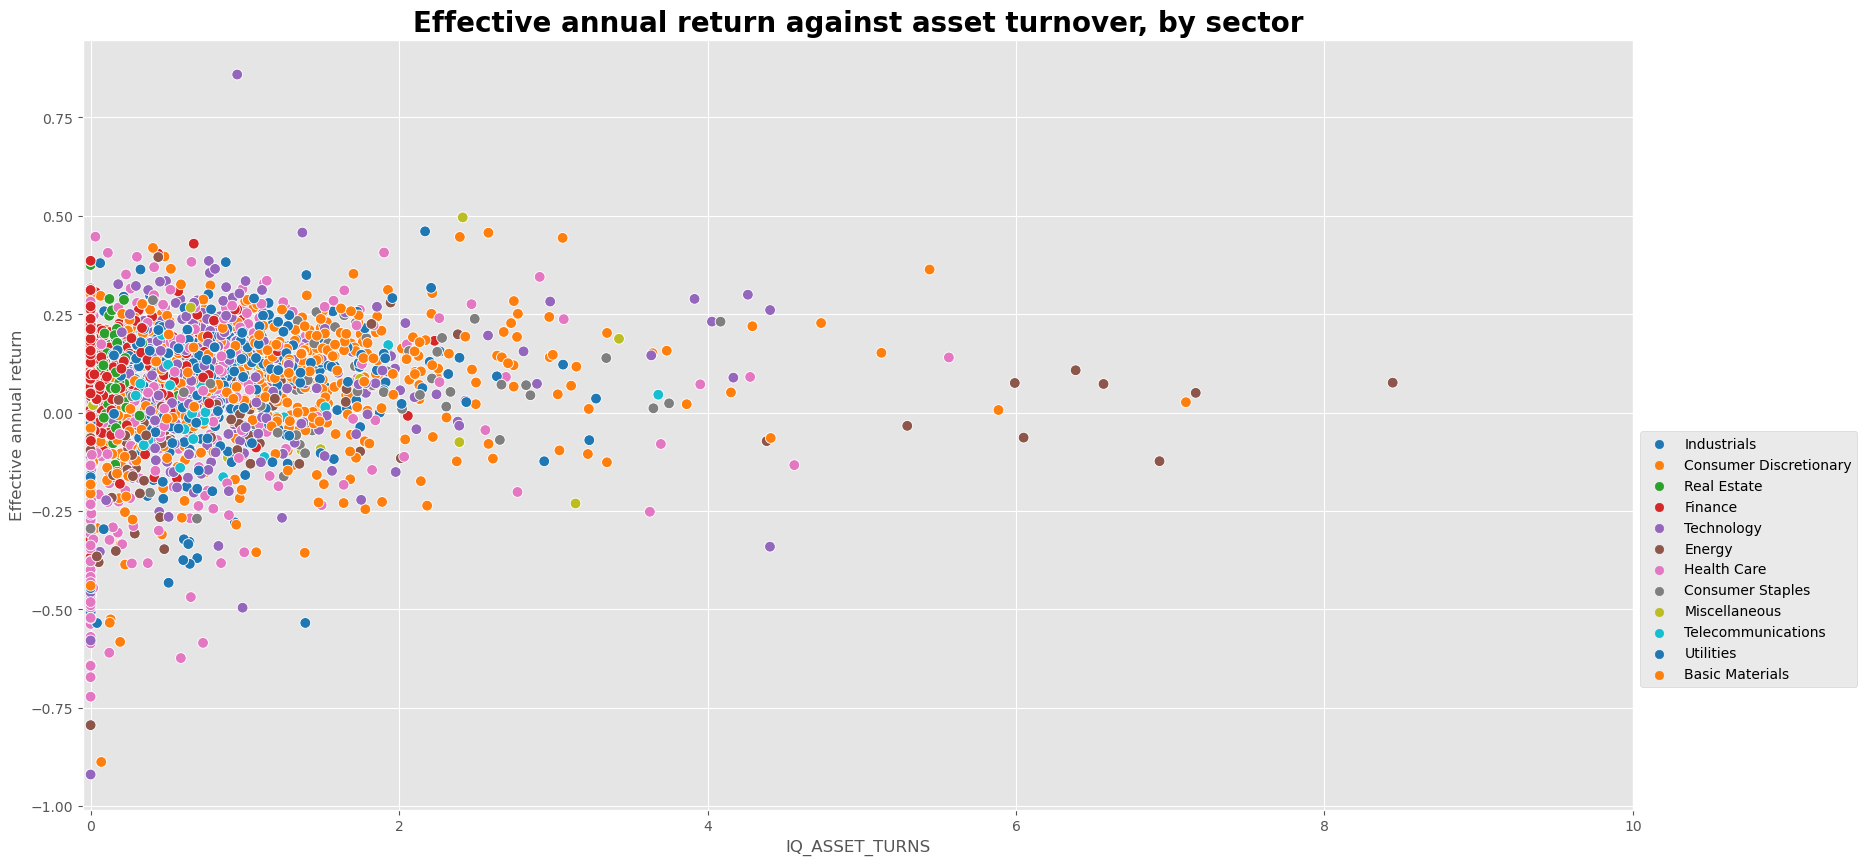

In [34]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_ASSET_TURNS', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.05,10)
fig.set_title('Effective annual return against asset turnover, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

We see that there are quite a few finance and health care stocks that have asset turnover of 0, which suggests possible data collection issues.

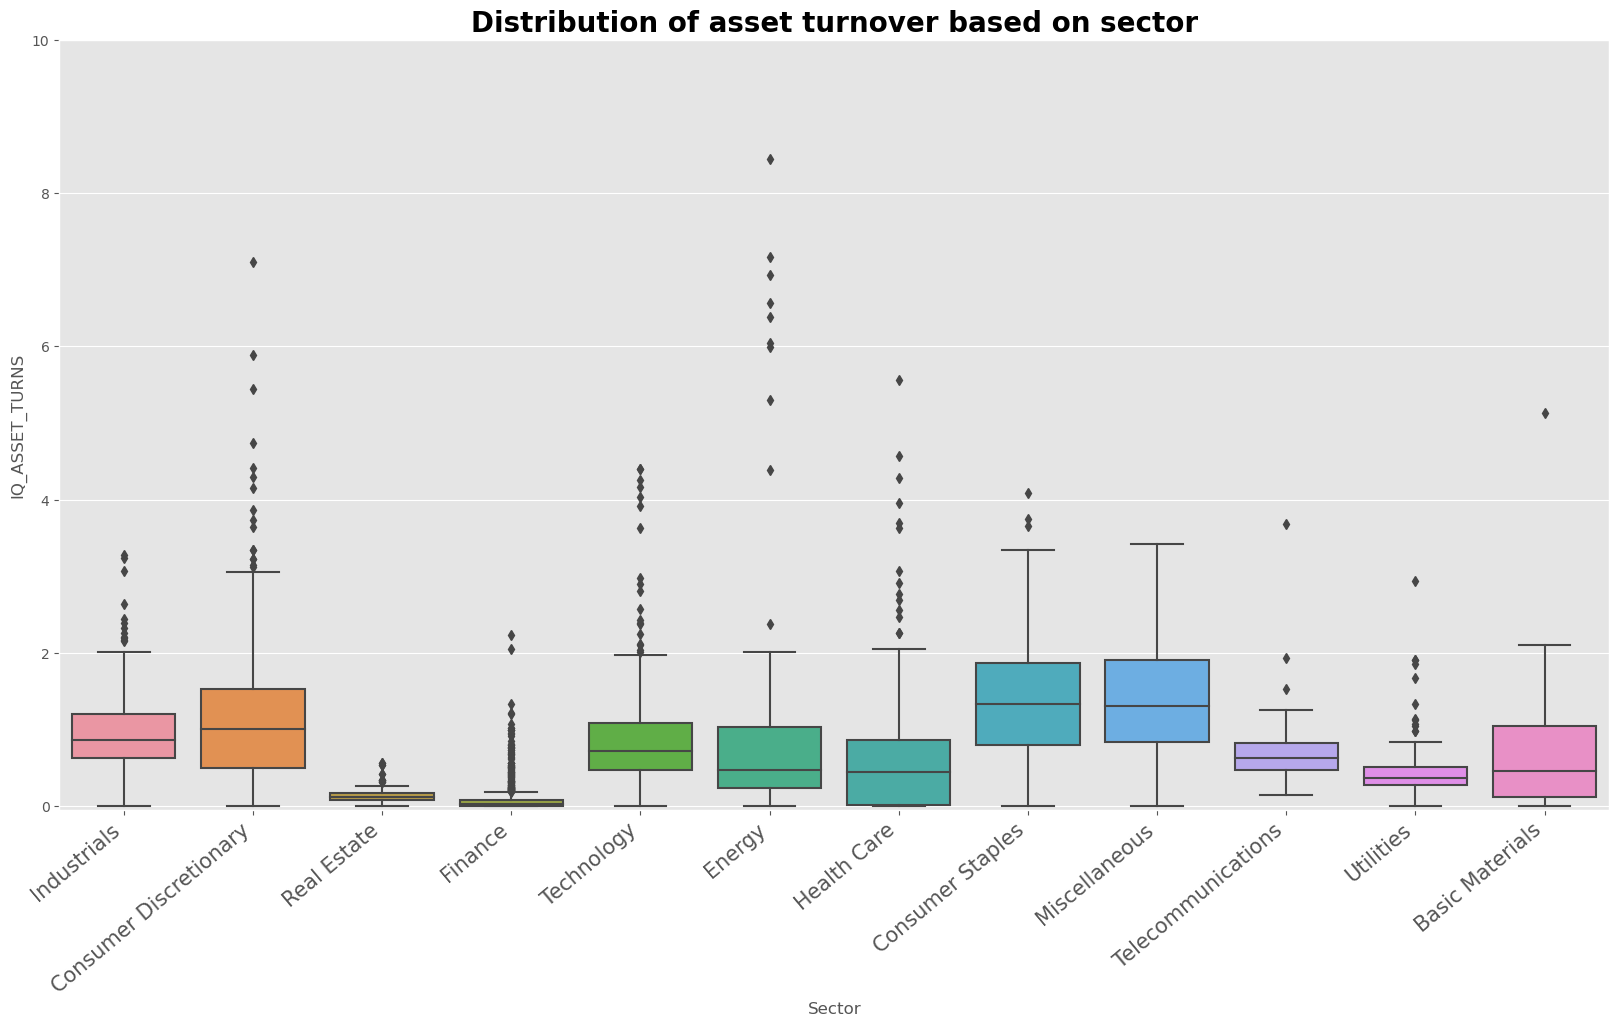

In [35]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_ASSET_TURNS', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-0.05,10)
fig.set_title('Distribution of asset turnover based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

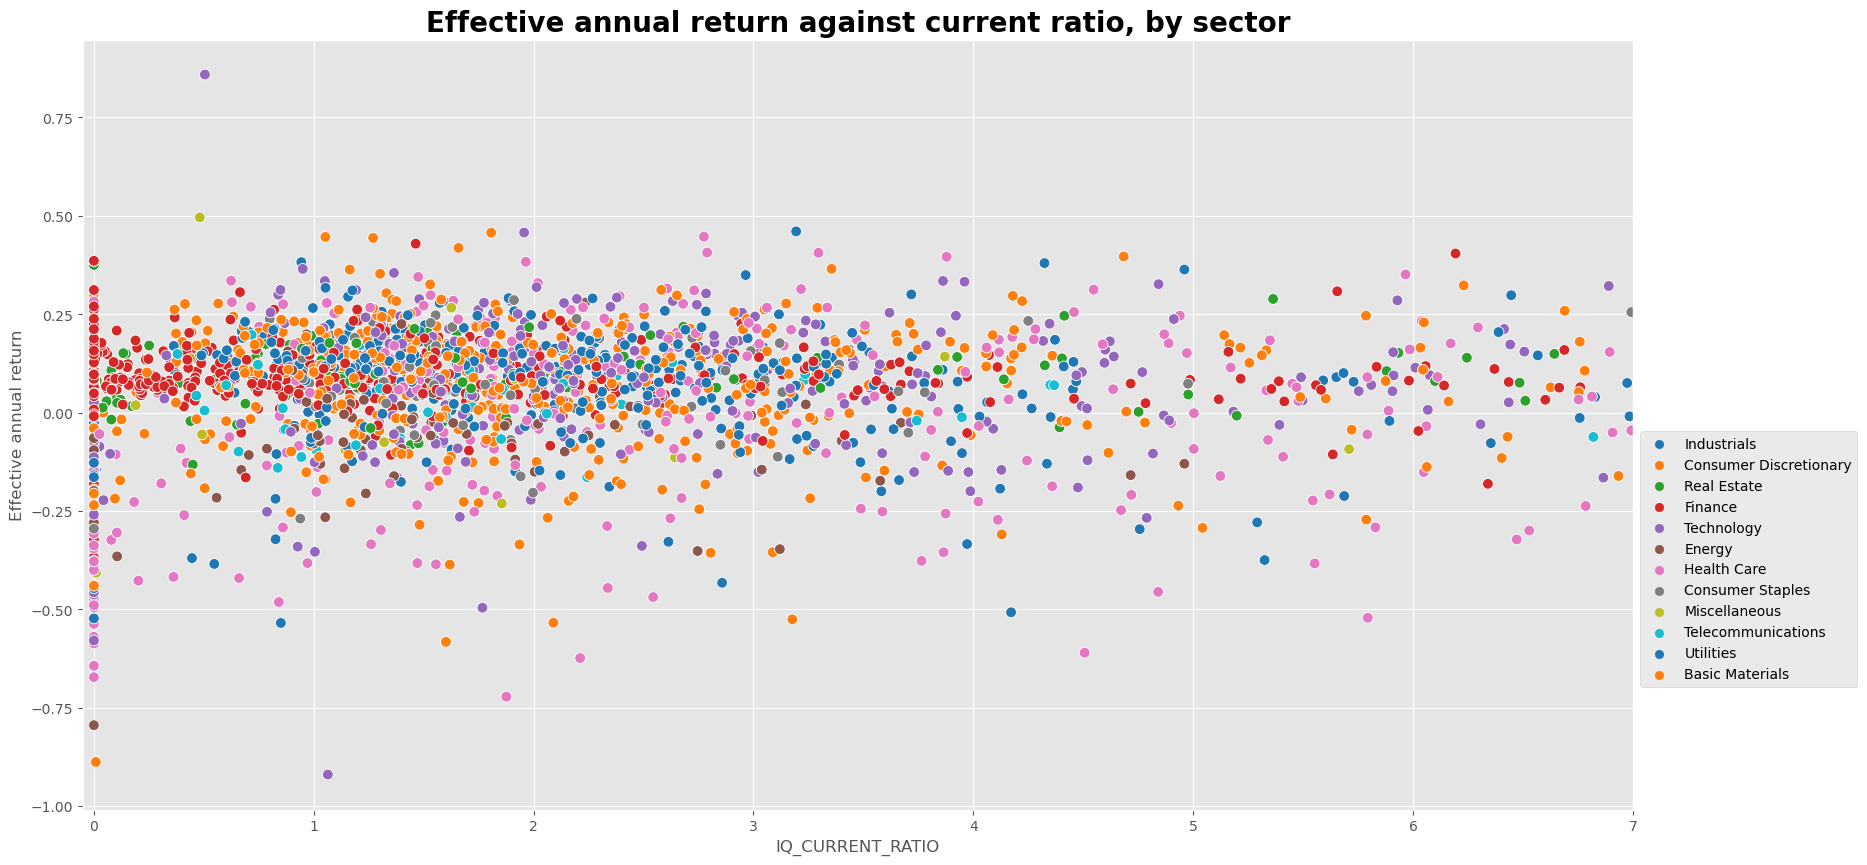

In [36]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_CURRENT_RATIO', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.05,7)
fig.set_title('Effective annual return against current ratio, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

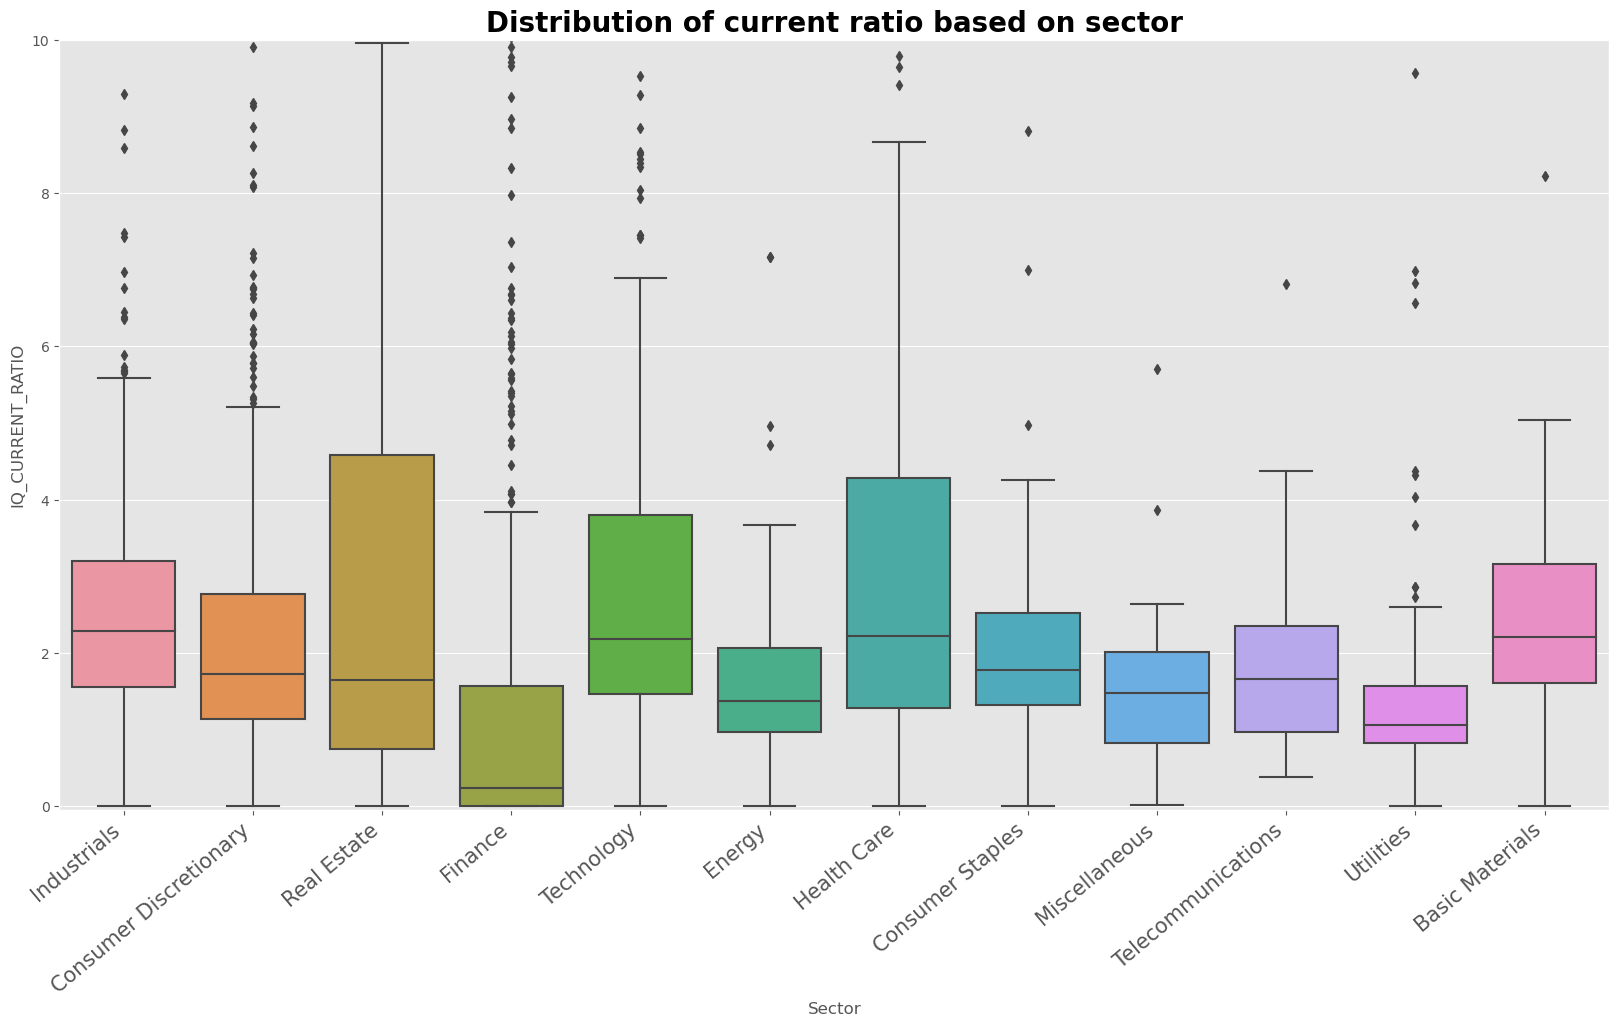

In [37]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_CURRENT_RATIO', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-0.05,10)
fig.set_title('Distribution of current ratio based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

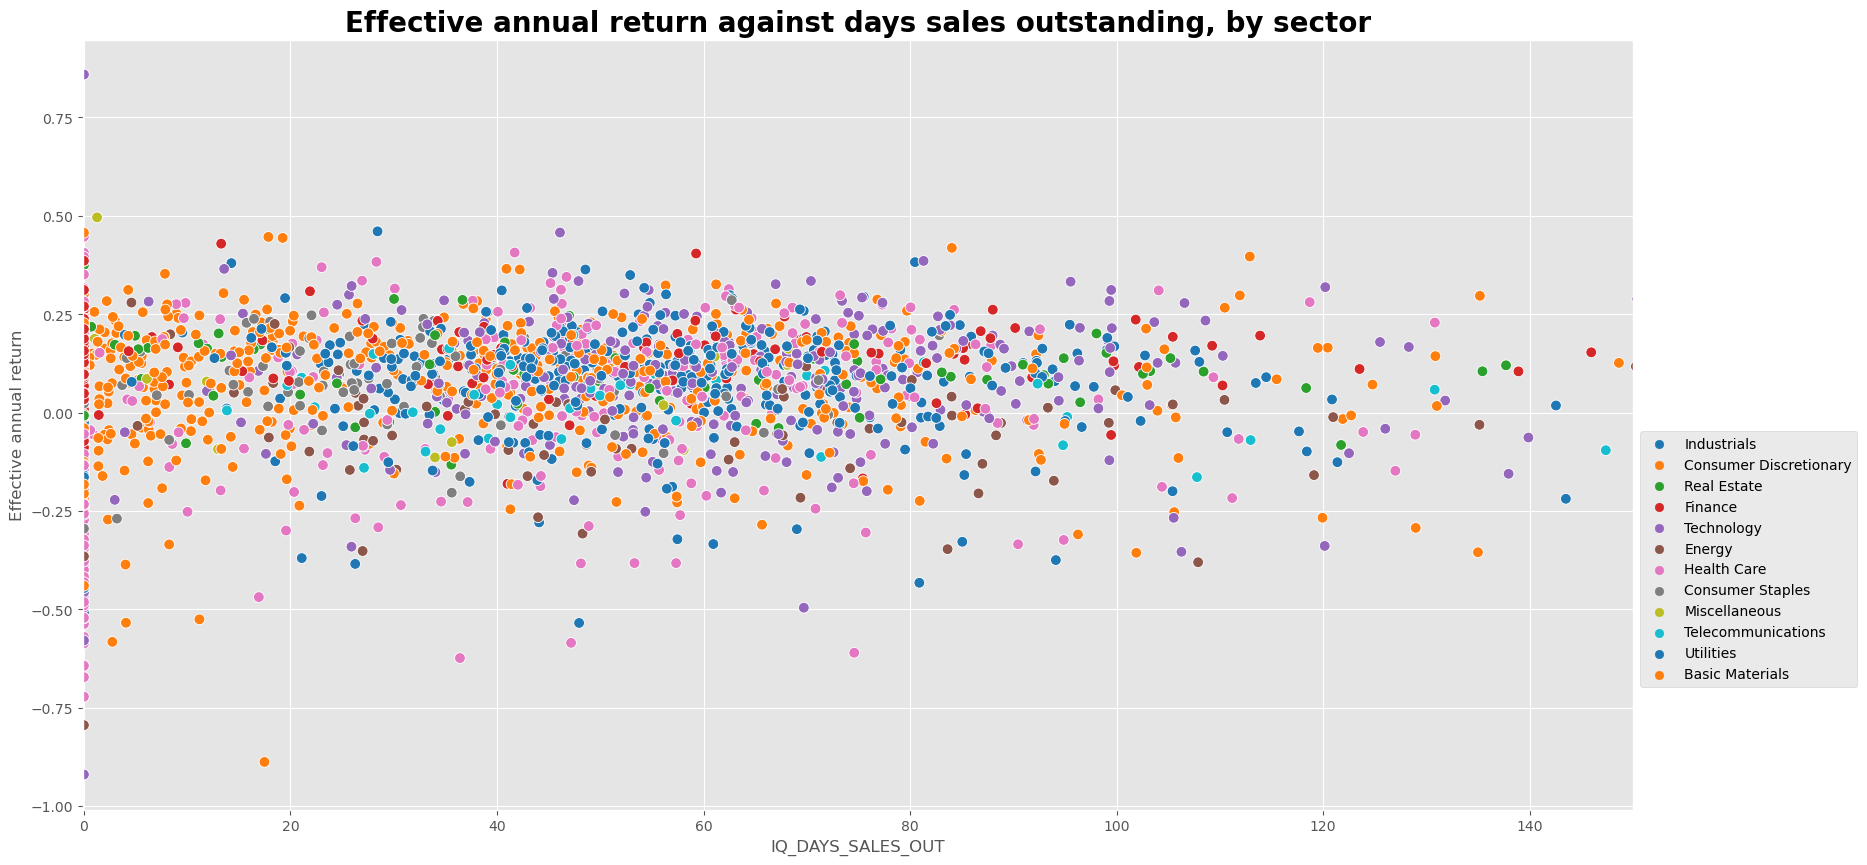

In [38]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_DAYS_SALES_OUT', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.1,150)
fig.set_title('Effective annual return against days sales outstanding, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

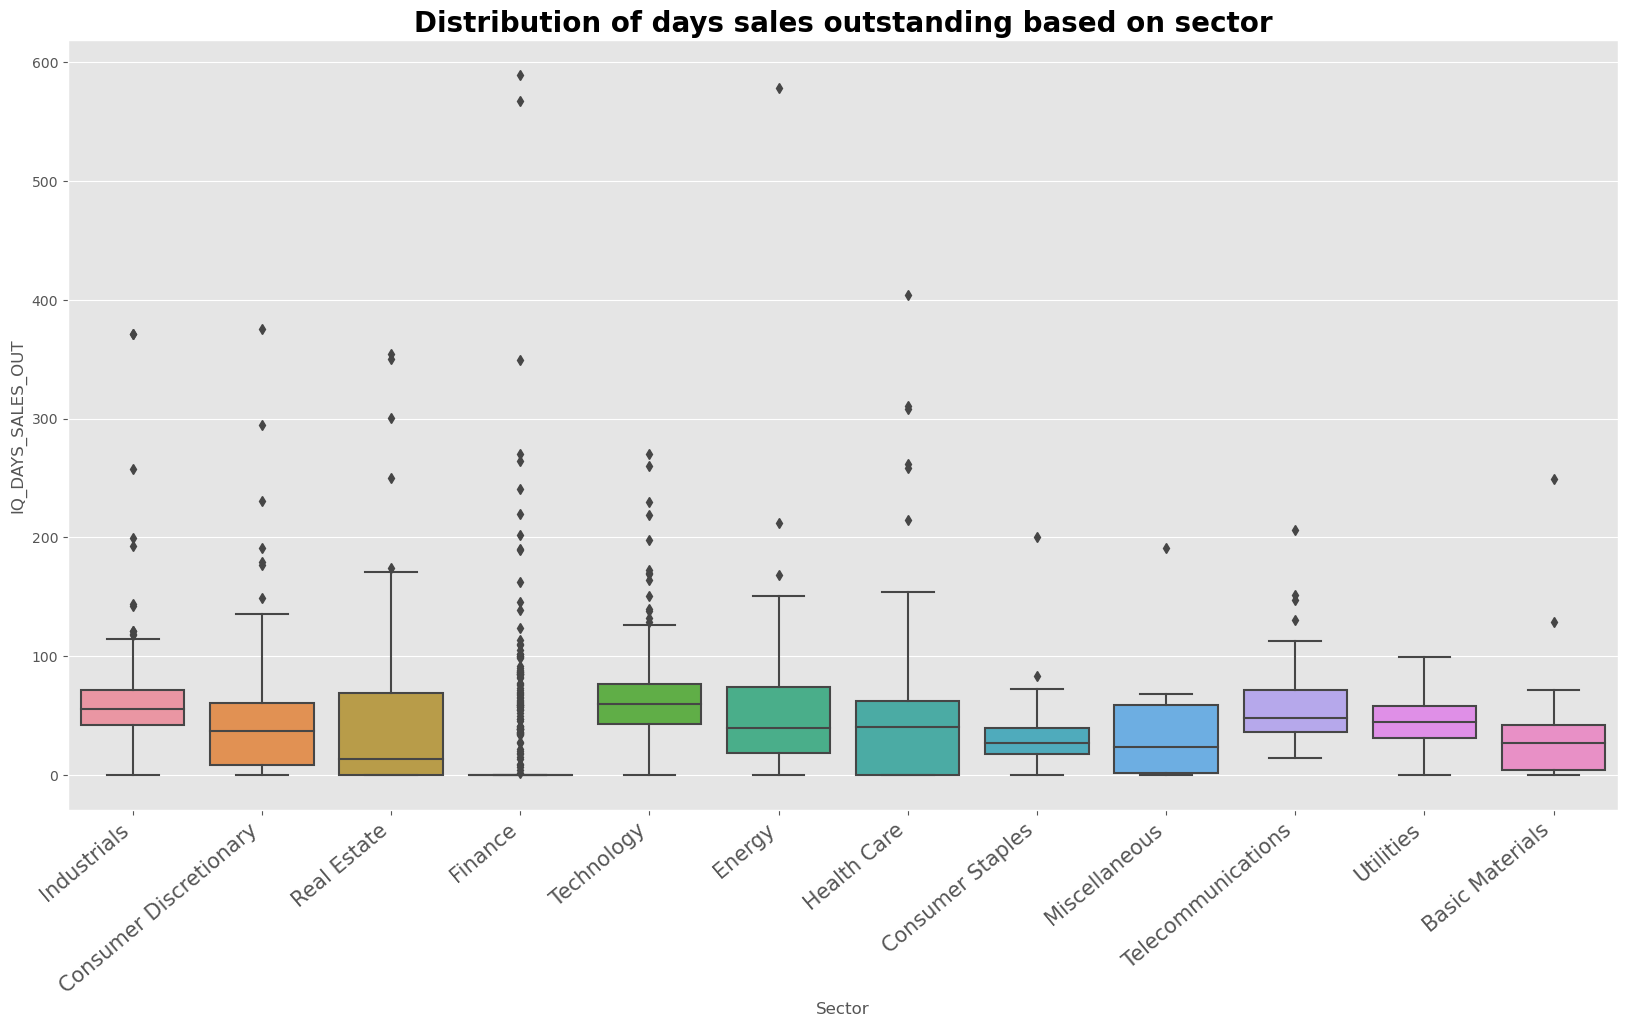

In [39]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_DAYS_SALES_OUT', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim()
fig.set_title('Distribution of days sales outstanding based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

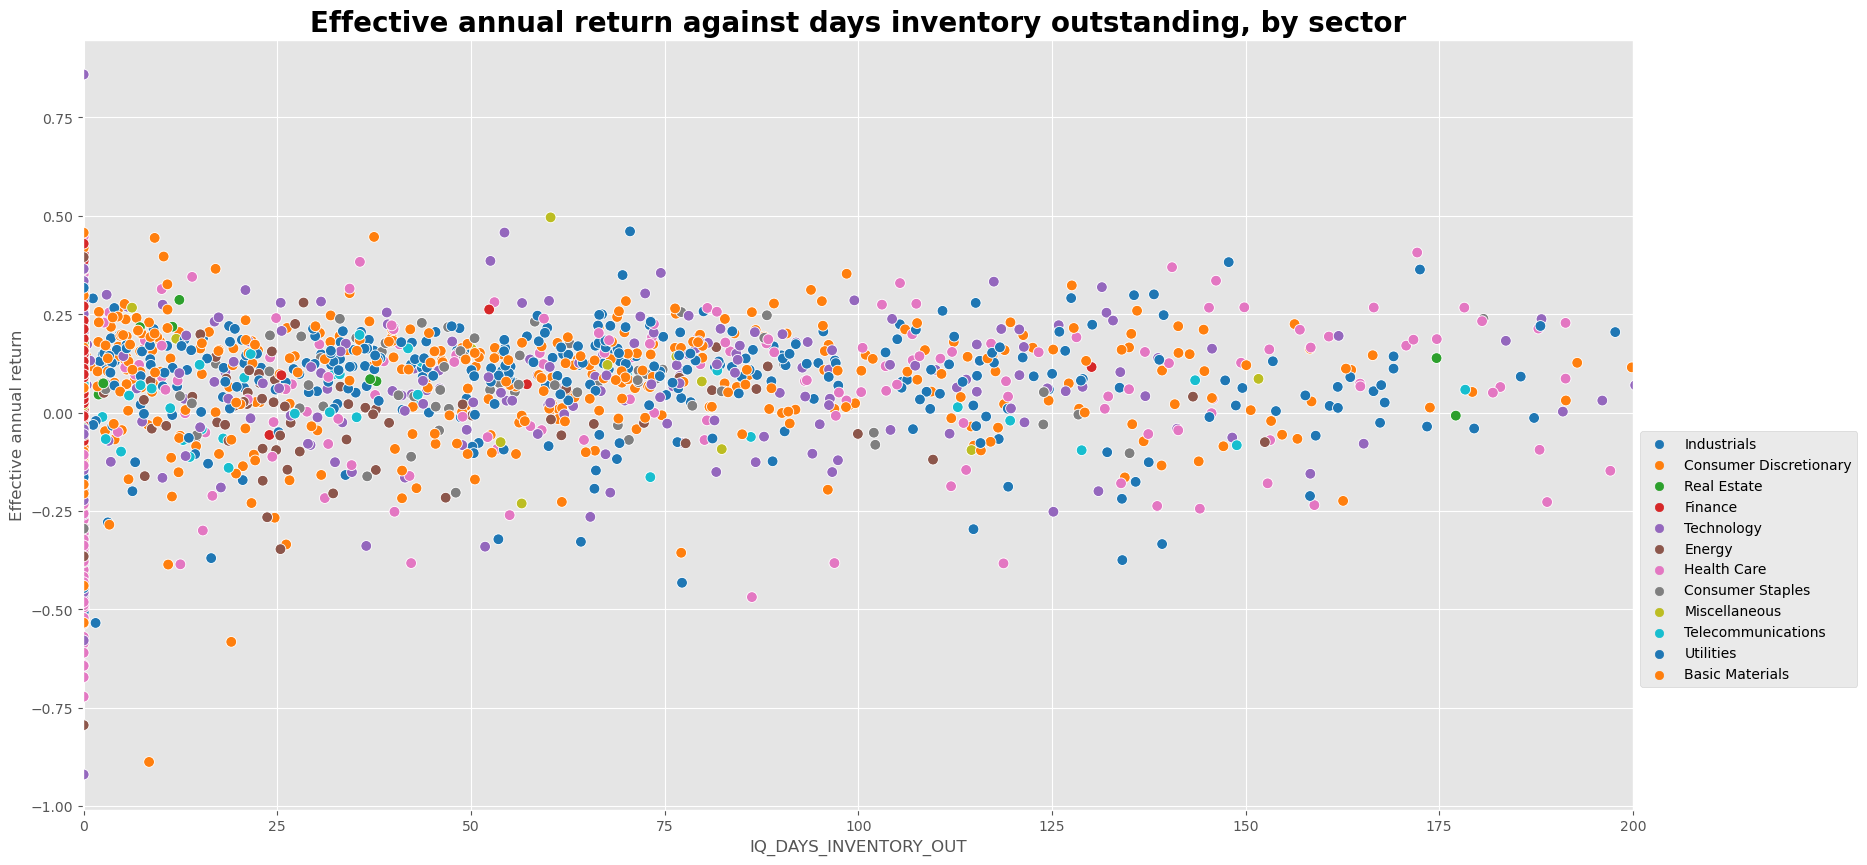

In [40]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_DAYS_INVENTORY_OUT', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.1,200)
fig.set_title('Effective annual return against days inventory outstanding, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

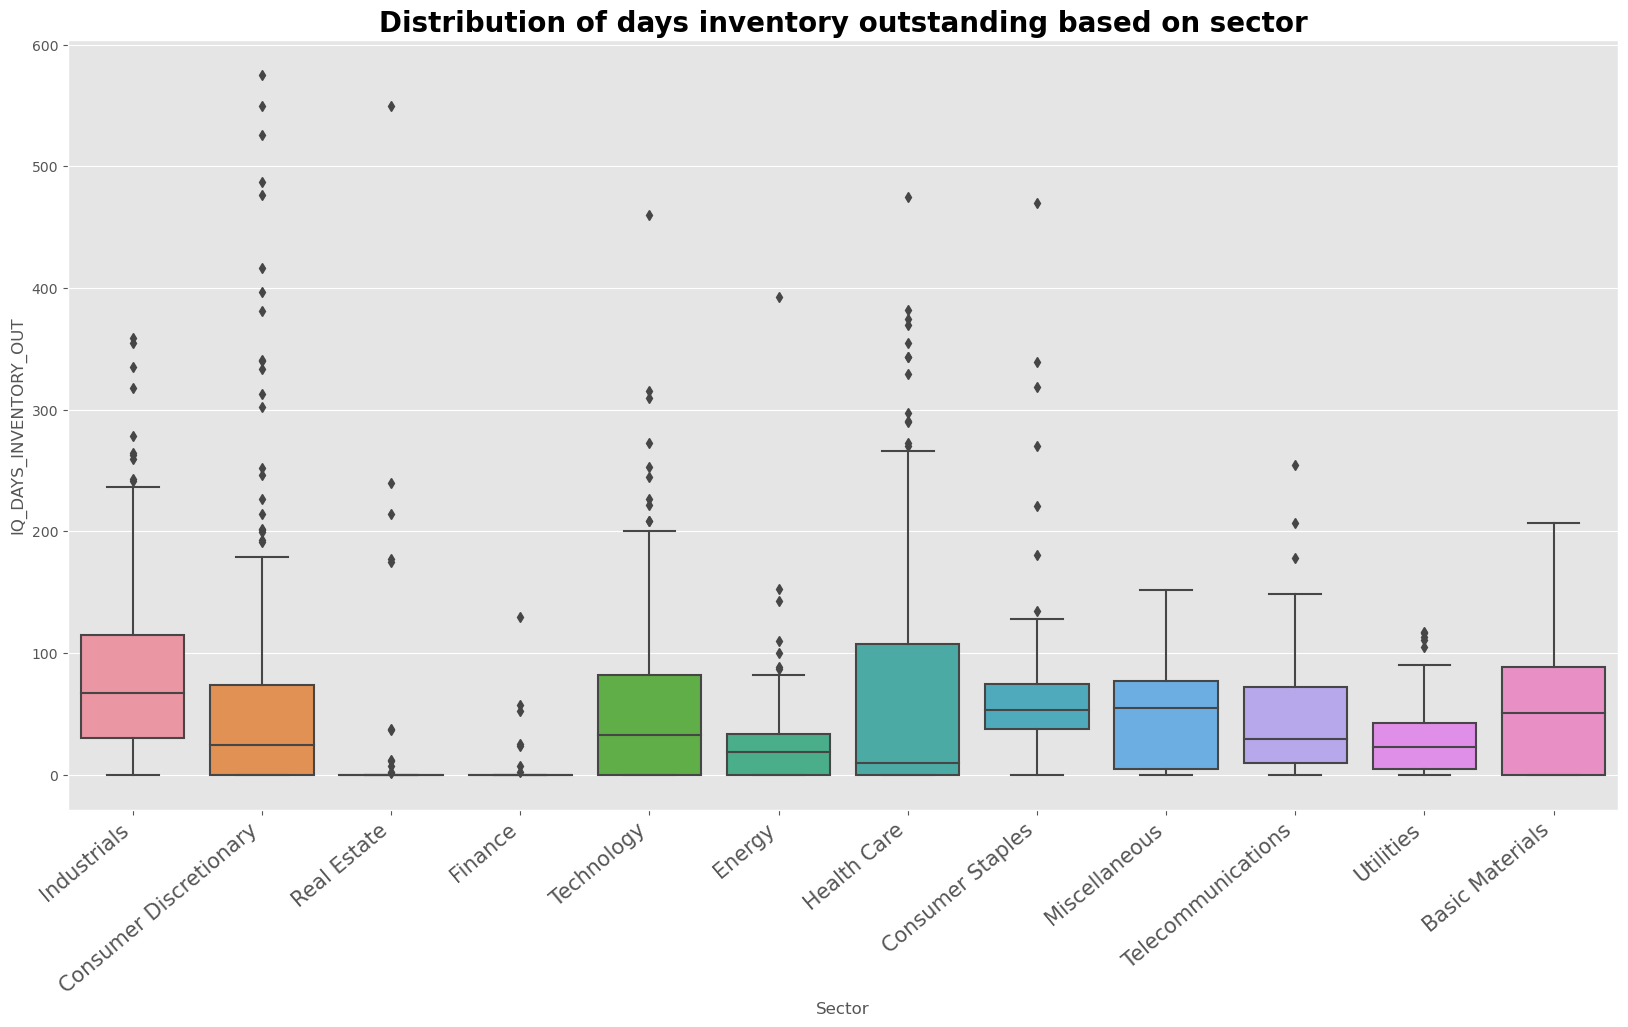

In [41]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_DAYS_INVENTORY_OUT', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim()
fig.set_title('Distribution of days inventory outstanding based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

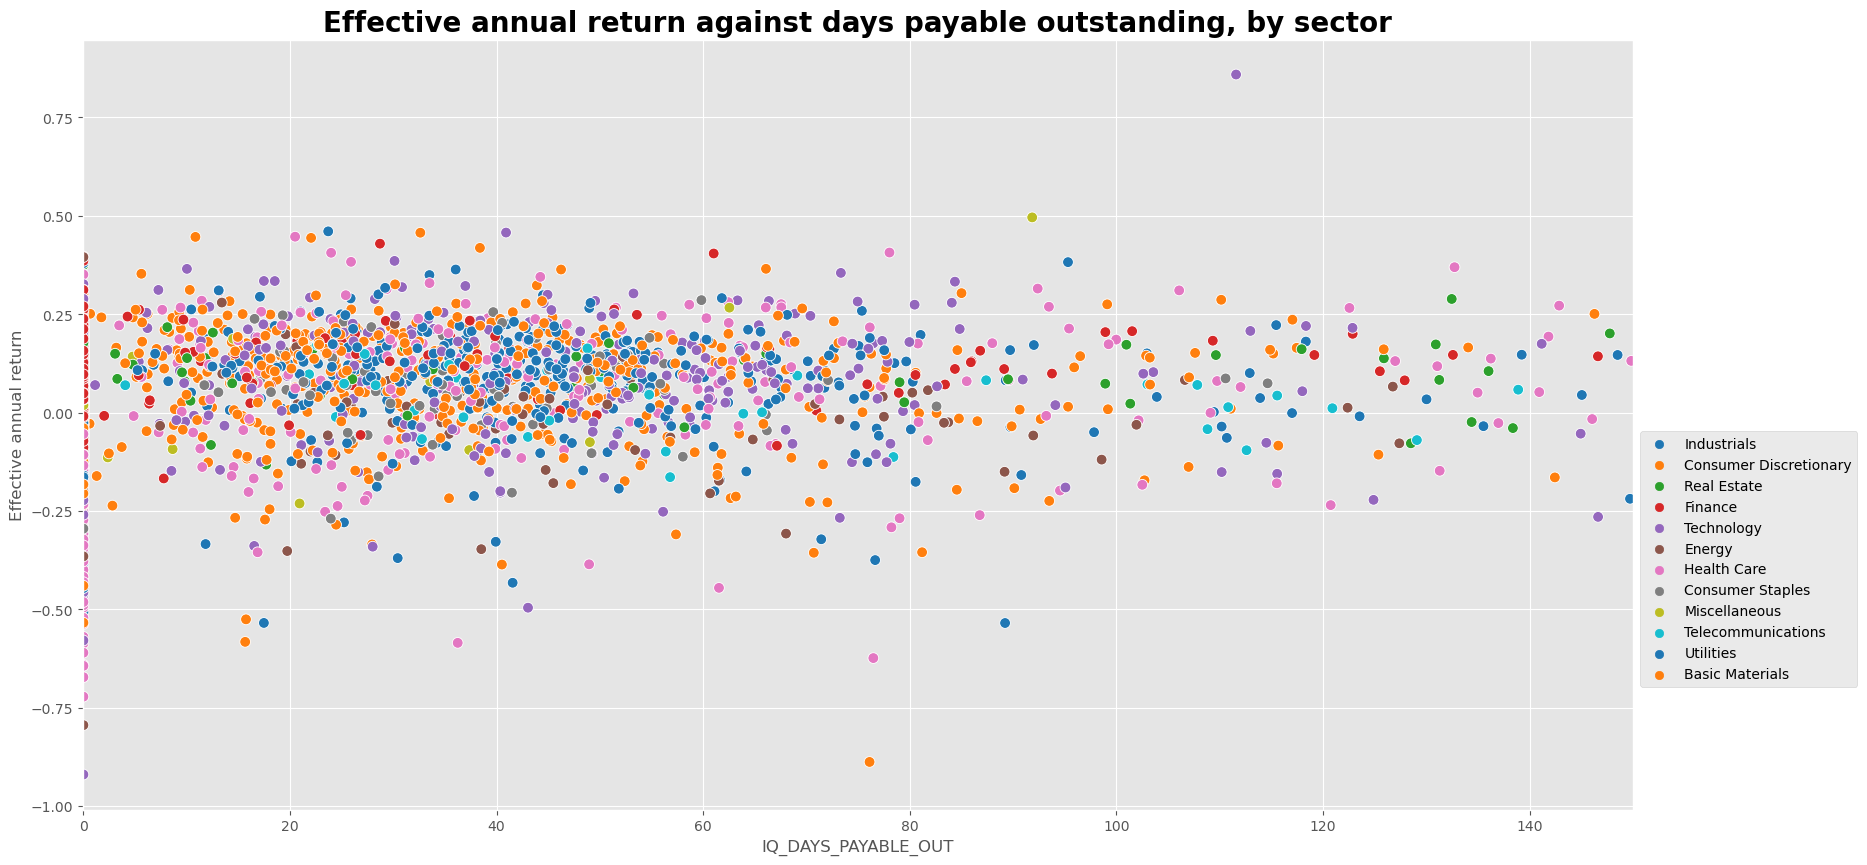

In [42]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_DAYS_PAYABLE_OUT', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.05,150)
fig.set_title('Effective annual return against days payable outstanding, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

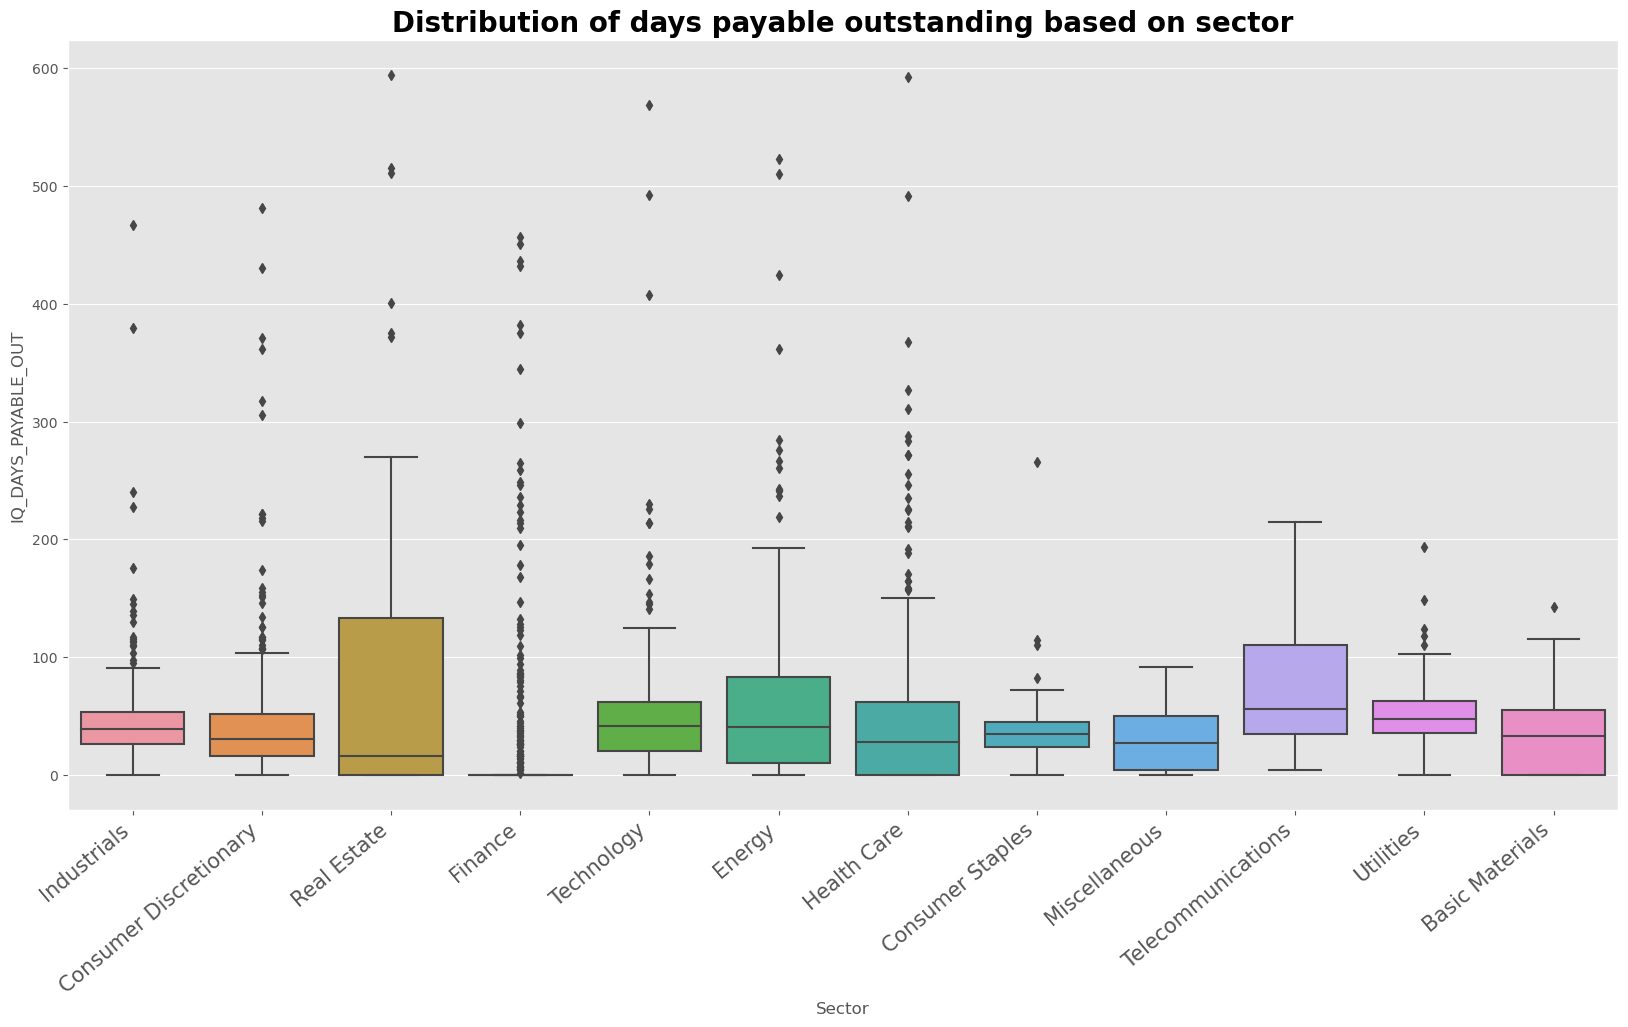

In [43]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_DAYS_PAYABLE_OUT', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim()
fig.set_title('Distribution of days payable outstanding based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()

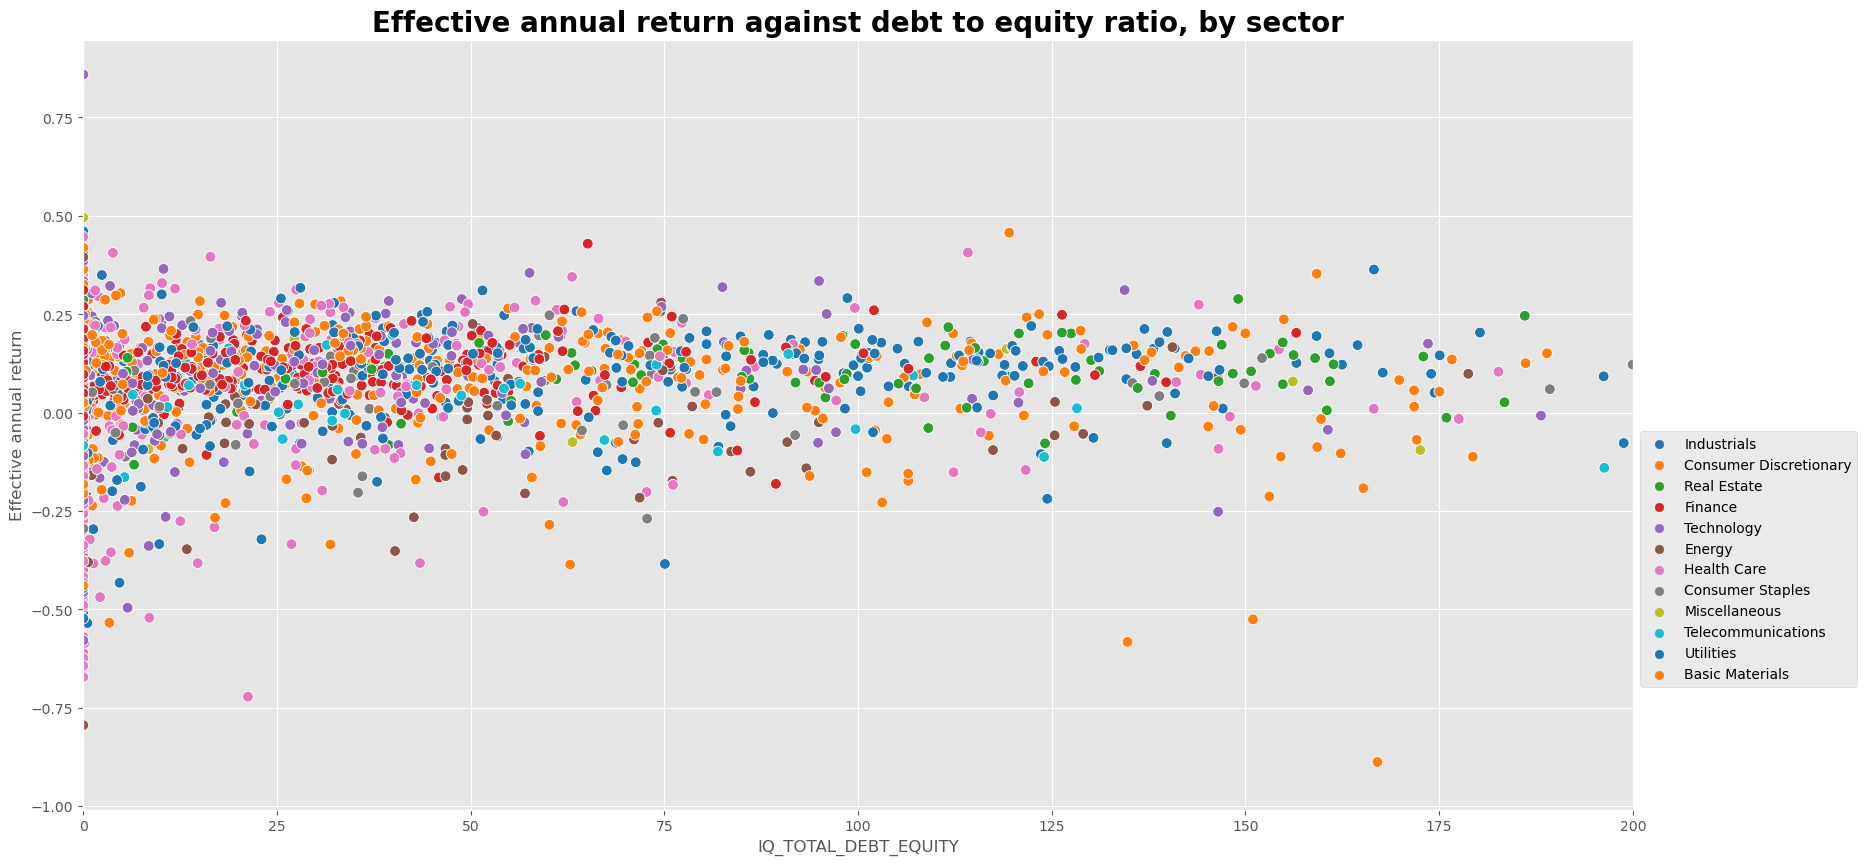

In [44]:
plt.figure(figsize=(20,10))
fig=sns.scatterplot(x='IQ_TOTAL_DEBT_EQUITY', y='Effective annual return', data=stockdata, hue='Sector', palette='tab10', s=60)
fig.set_xlim(-0.05,200)
fig.set_title('Effective annual return against debt to equity ratio, by sector', fontdict={'size': 20, 'weight': 'bold'})
fig.legend(loc=2, bbox_to_anchor=(1, 0.5))

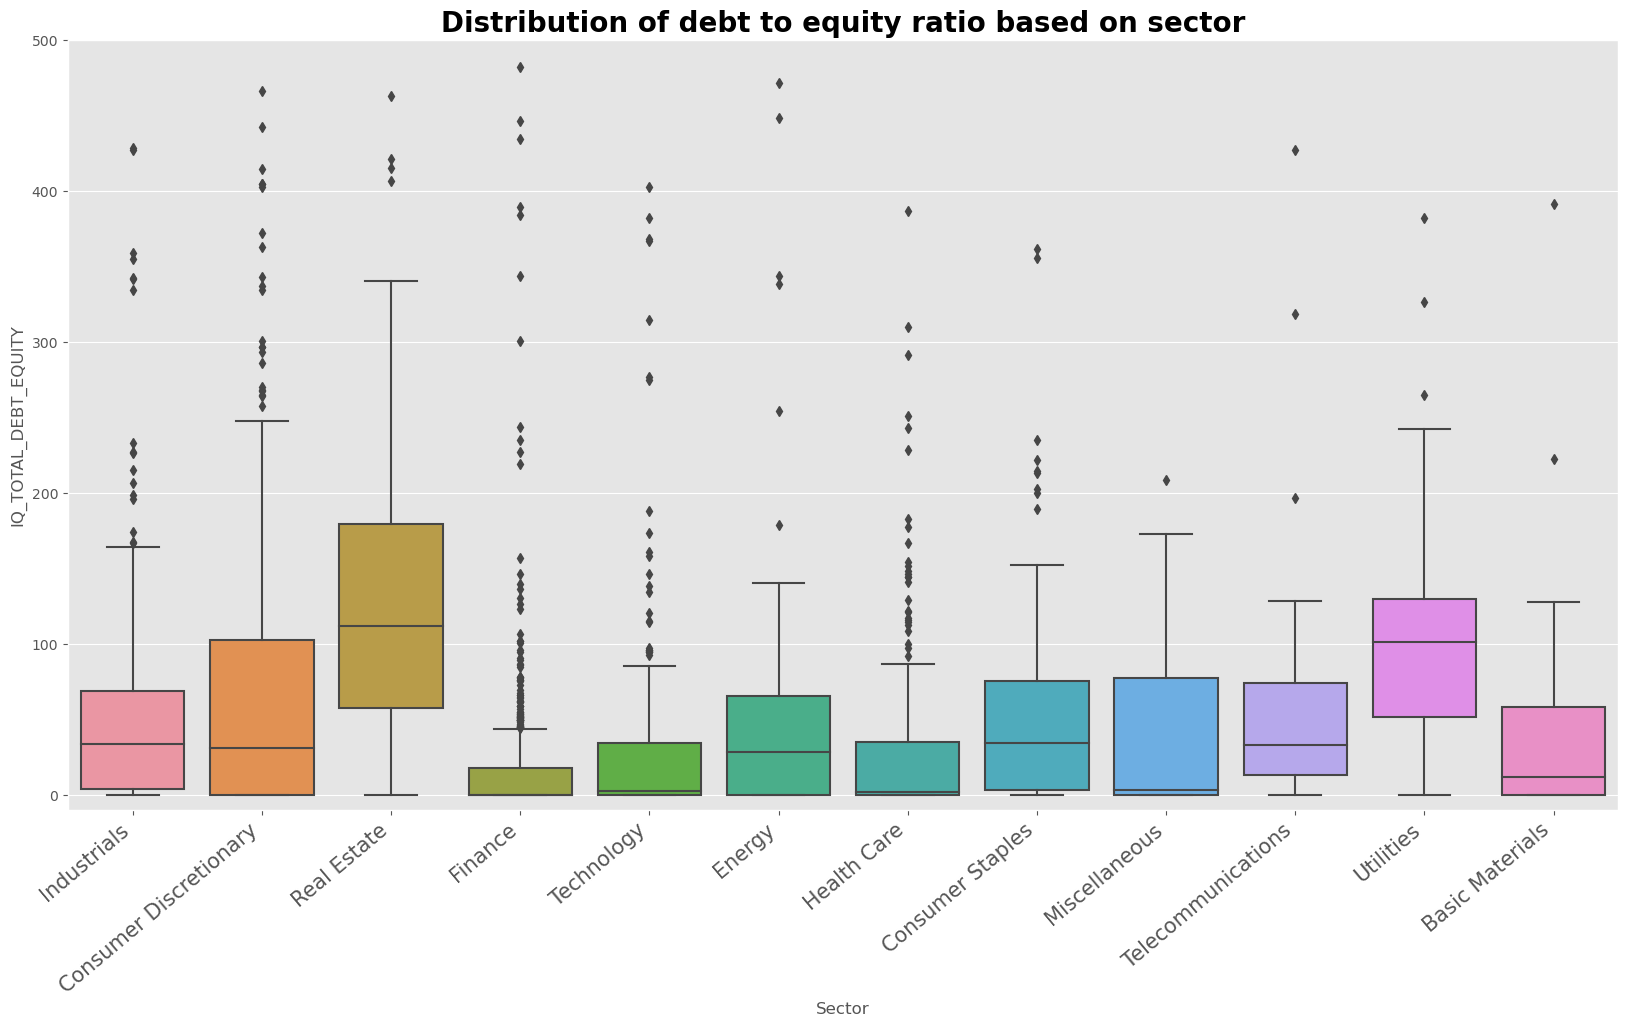

In [45]:
plt.figure(figsize=(20,10))
fig = sns.boxplot(x='Sector', y= 'IQ_TOTAL_DEBT_EQUITY', data=stockdata)
fig.set_xticklabels(fig.get_xticklabels(), fontsize=15, rotation=40, ha="right")
fig.set_ylim(-10,500)
fig.set_title('Distribution of debt to equity ratio based on sector', fontdict={'size': 20, 'weight': 'bold'})
plt.show()